In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import os 

/tmp/ipykernel_263459/683381825.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [2]:
def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


In [3]:
# Plotting an individual Es layer identified by Tasha's algorithm
### S U M M E R ###
WACCM_data_alt = '90-150km'
run_type = 'SMax'

# filename_append = '1sigma_3xMpza_1xpeak'
# criteria_label = 'A'

# filename_append = '0.5sigma_1xMpza_2xpeak'
# criteria_label = 'G'

# filename_append = '0.5sigma_1xMpza_1xpeak'
# criteria_label = 'H'

filename_append = '0.25sigma_2xMpza_1xpeak'
criteria_label = 'I'

# filename_append = '0sigma_1xMpza_1xpeak'
# criteria_label = 'M'

# filename_append = '0sigma_0.5xMpza_0.5xpeak'
# criteria_label = 'N'

## Change the current working directory to where you want to start searching
os.chdir('/resstore')
file = f'b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_Dec-Feb_90-150km_{filename_append}.nc'

ds_sum = xr.open_dataset(file, decode_times = False)
ds_sum

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 12.0 1.0 2.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

In [4]:
lev_sl = ds_sum.variables['lev_sl']
lat = ds_sum.variables['lat']
intlat = ds_sum.variables['latsl']
lon = ds_sum.variables['lon']
LT = ds_sum.variables['LT']
LT_L = ds_sum.variables['LT_L']

Zavg_sl = ds_sum.variables['Zavg_sl']
altavg_sl = ds_sum.variables['altavg_sl']

times_str_min = ds_sum.variables['times_str_min']
times_str_max = ds_sum.variables['times_str_max']

SpEs = ds_sum['SpEs'] #(25, 336, 96, 144, 2, 3)
Mptdens_sh = ds_sum['Mptdens_sh']

SpEsns = ds_sum['SpEsns']
Mptdensns = ds_sum['Mptdensns']

In [5]:
desired_altitude_km = 100.0
desired_alt_km = '100'

# Find the index of the closest altitude in geopH
closest_altitude_index = np.abs(altavg_sl - desired_altitude_km).argmin(dim='lev_sl')

SpEsns_sl = SpEsns.isel(lev_sl=closest_altitude_index)  #SpEsns=(lev_sl, time, lat, lon, timesl, mth)
Mptdensns_sl = Mptdensns.isel(lev_sl=closest_altitude_index)

# Change time and date below

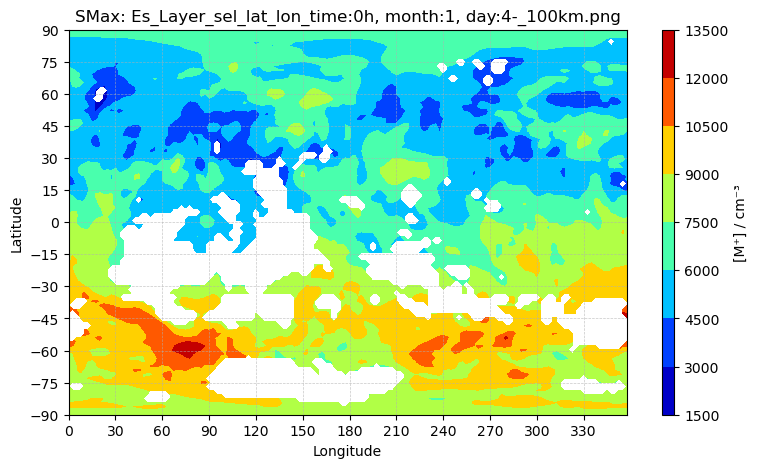

In [6]:
year = 2023 # {yyyy}
month = 1 # {mm}
day = 4 # {d}
time = 0 # {hh}
plotdatetime = f'time:{time}h, month:{month}, day:{day}-'

SpEsns_plot = SpEsns_sl[time, :, :, 0, month] #time, lat, lon, timesl, month   select time of first 2wk period of first month 


fig, ax = plt.subplots(figsize=(9,5))

# makes contour plot and formats bar on the side 
contour = ax.contourf(lon, lat, SpEsns_plot, cmap='jet')
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('[M⁺] / cm⁻³')

# set y ticks (latitude) every 15 degrees
ax.set_yticks(np.arange(-90, 91, 15))
ax.set_ylabel('Latitude')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set x ticks (longitude) every 30 degrees
ax.set_xticks(np.arange(0,360, 30))
ax.set_xlabel('Longitude')

figname = f'Es_Layer_sel_lat_lon_{plotdatetime}_{desired_alt_km}km.png'
ax.set_title(f'{run_type}: {figname}')

# plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')


plt.show()

# For a given location:


In [7]:
Esmin = 0  
Esmax = 24  

#Select data : 24h period, lev,lat,lon. (First month and 2wk period of that month)
Mptdensns_sl = Mptdensns[:,Esmin:Esmax,:,:,0,0]      #(19, 24, 96, 144)
SpEsns_sl = SpEsns[:,Esmin:Esmax,:,:,0,0]

targetlat1 = -60
targetlon1 = 78

#Select
Mptdensns_sel1 = Mptdensns_sl.sel(lat=targetlat1, lon=targetlon1, method='nearest')    #(19,24)
SpEsns_sel1 = SpEsns_sl.sel(lat=targetlat1, lon=targetlon1, method='nearest')

In [8]:
hr = 7   #starting UT index
timezoneshift = -3     
starthr = hr+timezoneshift   #starting local time

start_date = datetime(year, month, day, starthr)


num_days = 1  
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

vmin = 1e-1
vmax = 1e5

num_levels = 17

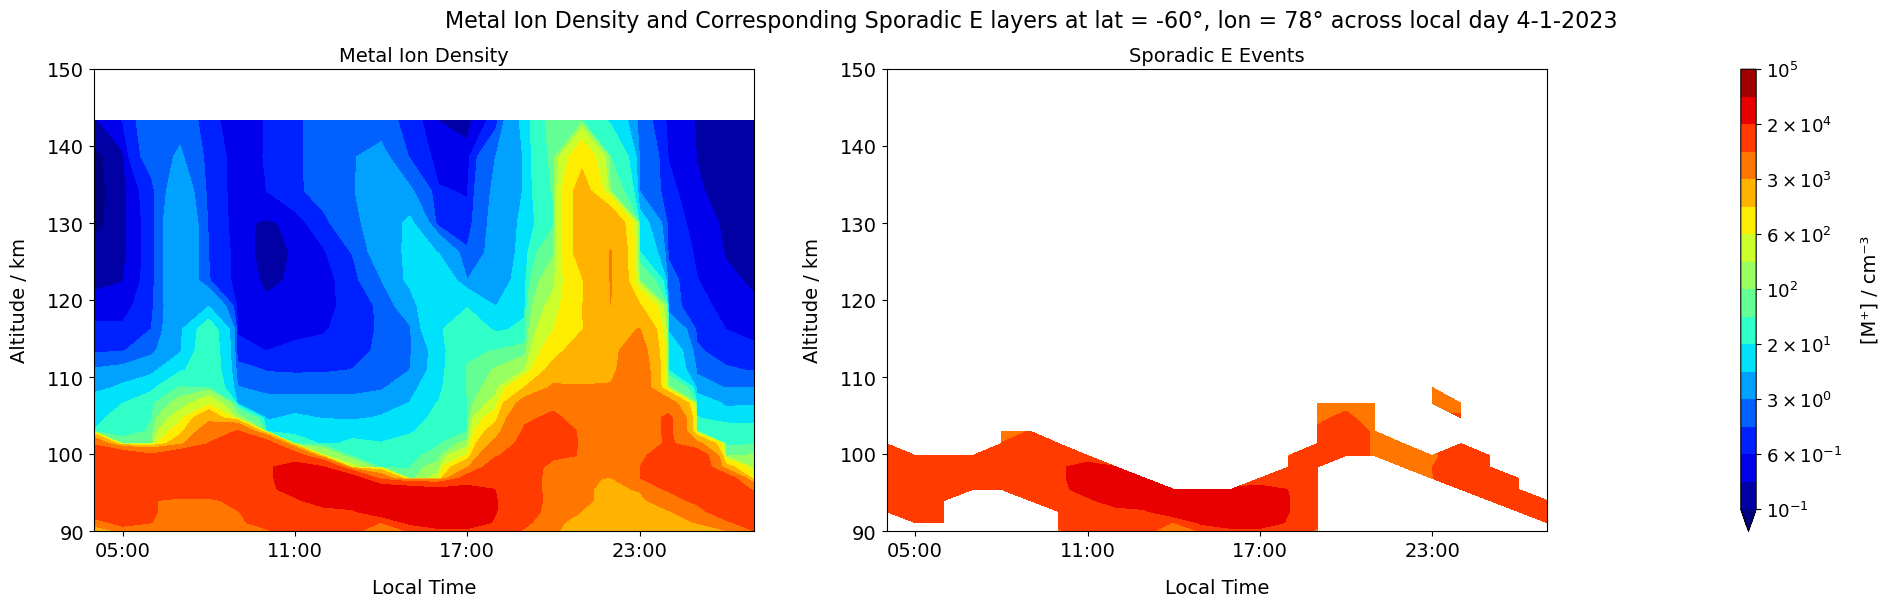

In [9]:
# create two plots and fill them with [M+] and Es 

fig, axes = plt.subplots(1, 2, figsize=(25, 6))

contour = axes[0].contourf(UT_Plot, Zavg_sl, Mptdensns_sel1, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

axes[0].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[0].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[0].set_ylim([90, 150])
axes[0].set_title(f'Metal Ion Density', fontsize=14)


contour = axes[1].contourf(UT_Plot, Zavg_sl, SpEsns_sel1, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

axes[1].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[1].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[1].set_ylim([90, 150])
axes[1].set_title(f'Sporadic E Events', fontsize=14)

fig.suptitle(f"Metal Ion Density and Corresponding Sporadic E layers at lat = {targetlat1}\u00b0, lon = {targetlon1}\u00b0 across local day {day}-{month}-{year}" , fontsize=16)


# cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))
# cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
# cbar.ax.tick_params(labelsize=13)
cbar = fig.colorbar(contour, ax=axes, orientation='vertical', pad=0.1, aspect=30, format=FuncFormatter(scientific_formatter))
cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
cbar.ax.tick_params(labelsize=13)

fig.autofmt_xdate()

for ax in axes:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='both', which='major', labelsize=14)

contour.set_clim(vmin, vmax)

start_date_str = str(start_date).replace(' ', '_')
# figname = f'Es_Layer_lat_{targetlat1}_lon_{targetlon1}_{start_date_str}LT.png'
# plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

# Comparing Solar Max and Min 

In [10]:
WACCM_UL = 150
ds_months_ar = np.arange(0,3)   
os.chdir('/resstore')

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']


run_name_med = 'Wuhu_IonTr_run'
run_name_min = 'SMin'
run_name_max = 'SMax'

run_name = 'Solar_Comp'

filename_append = '0.25sigma_2xMpza_1xpeak'     

#----------------------------------------------------------------------------------------

win_file_med = f'b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_med = f'b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_med = f'b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_med = f'b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win = xr.open_dataset(win_file_med, decode_times=False)
ds_spr = xr.open_dataset(spr_file_med, decode_times=False)
ds_sum = xr.open_dataset(sum_file_med, decode_times=False)
ds_aut = xr.open_dataset(aut_file_med, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_min = f'b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_min = f'b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_min = f'b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_min = f'b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_min = xr.open_dataset(win_file_min, decode_times=False)
ds_spr_min = xr.open_dataset(spr_file_min, decode_times=False)
ds_sum_min = xr.open_dataset(sum_file_min, decode_times=False)
ds_aut_min = xr.open_dataset(aut_file_min, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_max = f'b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_max = f'b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_max = f'b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_max = f'b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_max = xr.open_dataset(win_file_max, decode_times=False)
ds_spr_max = xr.open_dataset(spr_file_max, decode_times=False)
ds_sum_max = xr.open_dataset(sum_file_max, decode_times=False)
ds_aut_max = xr.open_dataset(aut_file_max, decode_times=False)

#----------------------------------------------------------------------------------------

ds_win

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 12.0 1.0 2.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

In [11]:
# SOLAR MED


lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']
LT_L = ds_win['LT_L']

altavg_sl_win = ds_win.variables['altavg_sl']
altavg_sl_spr = ds_spr.variables['altavg_sl']
altavg_sl_sum = ds_sum.variables['altavg_sl']
altavg_sl_aut = ds_aut.variables['altavg_sl']

times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 

win_SpEs_Occ_Freq_llbav = ds_win.variables['SpEs_Occ_Freq_llbav']  #lat,LT
win_SpEsns_Occ_Freq_llav = ds_win.variables['SpEsns_Occ_Freq_llav']  #lat,lon
win_SpEsns_Occ_Freq_lat = ds_win.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# win_SpEsns_Occ_Fr_dsavg = ds_win.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
# win_SpEs_Occ_Fr_b_dsavg = ds_win.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
# win_alt_sl_sh_avg_b_dsavg = ds_win.variables['alt_sl_sh_avg_b_dsavg']
# win_alt_sl_sh_avg_b_dsavgg = win_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# win_SpEs_Occ_Fr_b_dsavgLT = ds_win.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# win_alt_sl_sh_avg_b_dsavgLT = ds_win.variables['alt_sl_sh_avg_b_dsavgLT']
# win_alt_sl_sh_avg_b_dsavgLTT = win_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

# win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
# win_alt_sl_sh_avg_bb_5d_dsavg = ds_win.variables['alt_sl_sh_avg_bb_5d_dsavg']
# win_alt_sl_sh_avg_bb_5d_dsavgg = win_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

#=====================================================================
# # # S P R I N G # # # 

spr_SpEs_Occ_Freq_llbav = ds_spr.variables['SpEs_Occ_Freq_llbav']  #lat,LT
spr_SpEsns_Occ_Freq_llav = ds_spr.variables['SpEsns_Occ_Freq_llav']  #lat,lon
spr_SpEsns_Occ_Freq_lat = ds_spr.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# spr_SpEsns_Occ_Fr_dsavg = ds_spr.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
# spr_SpEs_Occ_Fr_b_dsavg = ds_spr.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
# spr_alt_sl_sh_avg_b_dsavg = ds_spr.variables['alt_sl_sh_avg_b_dsavg']
# spr_alt_sl_sh_avg_b_dsavgg = spr_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# spr_alt_sl_sh_avg_b_dsavgLT = ds_spr.variables['alt_sl_sh_avg_b_dsavgLT']
# spr_alt_sl_sh_avg_b_dsavgLTT = spr_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

# spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
# spr_alt_sl_sh_avg_bb_5d_dsavg = ds_spr.variables['alt_sl_sh_avg_bb_5d_dsavg']
# spr_alt_sl_sh_avg_bb_5d_dsavgg = spr_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

#=====================================================================

# # # S U M M E R # # # 

sum_SpEs_Occ_Freq_llbav = ds_sum.variables['SpEs_Occ_Freq_llbav']  #lat,LT
sum_SpEsns_Occ_Freq_llav = ds_sum.variables['SpEsns_Occ_Freq_llav']  #lat,lon
sum_SpEsns_Occ_Freq_lat = ds_sum.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# sum_SpEsns_Occ_Fr_dsavg = ds_sum.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
# sum_SpEs_Occ_Fr_b_dsavg = ds_sum.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
# sum_alt_sl_sh_avg_b_dsavg = ds_sum.variables['alt_sl_sh_avg_b_dsavg']
# sum_alt_sl_sh_avg_b_dsavgg = sum_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# sum_alt_sl_sh_avg_b_dsavgLT = ds_sum.variables['alt_sl_sh_avg_b_dsavgLT']
# sum_alt_sl_sh_avg_b_dsavgLTT = sum_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg = ds_sum.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg = sum_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d = ds_sum.variables['Mptdens_avv1_b_5d']

#=====================================================================
# # # A U T U M N # # # 

aut_SpEs_Occ_Freq_llbav = ds_aut.variables['SpEs_Occ_Freq_llbav']  #lat,LT
aut_SpEsns_Occ_Freq_llav = ds_aut.variables['SpEsns_Occ_Freq_llav']  #lat,lon
aut_SpEsns_Occ_Freq_lat = ds_aut.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
# aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
# aut_alt_sl_sh_avg_b_dsavg = ds_aut.variables['alt_sl_sh_avg_b_dsavg']
# aut_alt_sl_sh_avg_b_dsavgg = aut_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# aut_alt_sl_sh_avg_b_dsavgLT = ds_aut.variables['alt_sl_sh_avg_b_dsavgLT']
# aut_alt_sl_sh_avg_b_dsavgLTT = aut_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

# aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
# aut_alt_sl_sh_avg_bb_5d_dsavg = ds_aut.variables['alt_sl_sh_avg_bb_5d_dsavg']
# aut_alt_sl_sh_avg_bb_5d_dsavgg = aut_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])


In [12]:
#=====================================================================

# SOLAR MIN

# # # W I N T E R # # # 
min_win_SpEs_Occ_Freq_llbav = ds_win_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_win_SpEsns_Occ_Freq_llav = ds_win_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_win_SpEsns_Occ_Freq_lat = ds_win_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# # # S P R I N G # # # 
min_spr_SpEs_Occ_Freq_llbav = ds_spr_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_spr_SpEsns_Occ_Freq_llav = ds_spr_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_spr_SpEsns_Occ_Freq_lat = ds_spr_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# # # S U M M E R # # # 
min_sum_SpEs_Occ_Freq_llbav = ds_sum_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_sum_SpEsns_Occ_Freq_llav = ds_sum_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_sum_SpEsns_Occ_Freq_lat = ds_sum_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# # # A U T U M N # # # 
min_aut_SpEs_Occ_Freq_llbav = ds_aut_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_aut_SpEsns_Occ_Freq_llav = ds_aut_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_aut_SpEsns_Occ_Freq_lat = ds_aut_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

#=====================================================================

# SOLAR MAX

# # # W I N T E R # # # 
max_win_SpEs_Occ_Freq_llbav = ds_win_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_win_SpEsns_Occ_Freq_llav = ds_win_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_win_SpEsns_Occ_Freq_lat = ds_win_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# # # S P R I N G # # # 
max_spr_SpEs_Occ_Freq_llbav = ds_spr_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_spr_SpEsns_Occ_Freq_llav = ds_spr_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_spr_SpEsns_Occ_Freq_lat = ds_spr_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# # # S U M M E R # # # 
max_sum_SpEs_Occ_Freq_llbav = ds_sum_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_sum_SpEsns_Occ_Freq_llav = ds_sum_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_sum_SpEsns_Occ_Freq_lat = ds_sum_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# # # A U T U M N # # # 
max_aut_SpEs_Occ_Freq_llbav = ds_aut_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_aut_SpEsns_Occ_Freq_llav = ds_aut_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_aut_SpEsns_Occ_Freq_lat = ds_aut_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon


In [13]:
Mptdensns_win_max = ds_win_max['Mptdensns']
Mptdensns_spr_max = ds_spr_max['Mptdensns']
Mptdensns_sum_max = ds_sum_max['Mptdensns']
Mptdensns_aut_max = ds_aut_max['Mptdensns']

Mptdensns_win_min = ds_win_min['Mptdensns']
Mptdensns_spr_min = ds_spr_min['Mptdensns']
Mptdensns_sum_min = ds_sum_min['Mptdensns']
Mptdensns_aut_min = ds_aut_min['Mptdensns']
Mptdensns_win_max.shape

(23, 336, 96, 144, 2, 3)

In [14]:
# SOLAR MED 

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr = ds_spr.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum = ds_sum.variables['SpEs_freq_time']  
SpEs_freq_time_aut = ds_aut.variables['SpEs_freq_time']  
SpEs_freq_time_win = ds_win.variables['SpEs_freq_time']  

#----------------------------------------
#On alt-lat-(LT) grid 
SpEs_mth_spr = np.sum(SpEs_freq_time_spr, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum = np.sum(SpEs_freq_time_sum, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut = np.sum(SpEs_freq_time_aut, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win = np.sum(SpEs_freq_time_win, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr = np.sum(SpEs_mth_spr, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum = np.sum(SpEs_mth_sum, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut = np.sum(SpEs_mth_aut, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win = np.sum(SpEs_mth_win, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT = np.sum(tot_SpEs_spr, axis=0)
SpEs_sum_lat_LT = np.sum(tot_SpEs_sum, axis=0)
SpEs_aut_lat_LT = np.sum(tot_SpEs_aut, axis=0)
SpEs_win_lat_LT = np.sum(tot_SpEs_win, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat = np.sum(tot_SpEs_spr, axis=2)
SpEs_sum_alt_lat = np.sum(tot_SpEs_sum, axis=2)
SpEs_aut_alt_lat = np.sum(tot_SpEs_aut, axis=2)
SpEs_win_alt_lat = np.sum(tot_SpEs_win, axis=2)


#=====================================================================

# SOLAR MAX

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr_max = ds_spr_max.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum_max = ds_sum_max.variables['SpEs_freq_time']  
SpEs_freq_time_aut_max = ds_aut_max.variables['SpEs_freq_time']  
SpEs_freq_time_win_max = ds_win_max.variables['SpEs_freq_time']  

#----------------------------------------

#On alt-lat-(LT) grid 
SpEs_mth_spr_max = np.sum(SpEs_freq_time_spr_max, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_max = np.sum(SpEs_freq_time_sum_max, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut_max = np.sum(SpEs_freq_time_aut_max, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win_max = np.sum(SpEs_freq_time_win_max, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr_max = np.sum(SpEs_mth_spr_max, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_max = np.sum(SpEs_mth_sum_max, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut_max = np.sum(SpEs_mth_aut_max, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win_max = np.sum(SpEs_mth_win_max, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT_max = np.sum(tot_SpEs_spr_max, axis=0)
SpEs_sum_lat_LT_max = np.sum(tot_SpEs_sum_max, axis=0)
SpEs_aut_lat_LT_max = np.sum(tot_SpEs_aut_max, axis=0)
SpEs_win_lat_LT_max = np.sum(tot_SpEs_win_max, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat_max = np.sum(tot_SpEs_spr_max, axis=2)
SpEs_sum_alt_lat_max = np.sum(tot_SpEs_sum_max, axis=2)
SpEs_aut_alt_lat_max = np.sum(tot_SpEs_aut_max, axis=2)
SpEs_win_alt_lat_max = np.sum(tot_SpEs_win_max, axis=2)

#=====================================================================

# SOLAR MIN

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr_min = ds_spr_min.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum_min = ds_sum_min.variables['SpEs_freq_time']  
SpEs_freq_time_aut_min = ds_aut_min.variables['SpEs_freq_time']  
SpEs_freq_time_win_min = ds_win_min.variables['SpEs_freq_time']  

#----------------------------------------

#On alt-lat-(LT) grid 
SpEs_mth_spr_min = np.sum(SpEs_freq_time_spr_min, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_min = np.sum(SpEs_freq_time_sum_min, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut_min = np.sum(SpEs_freq_time_aut_min, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win_min = np.sum(SpEs_freq_time_win_min, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr_min = np.sum(SpEs_mth_spr_min, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_min = np.sum(SpEs_mth_sum_min, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut_min = np.sum(SpEs_mth_aut_min, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win_min = np.sum(SpEs_mth_win_min, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT_min = np.sum(tot_SpEs_spr_min, axis=0)
SpEs_sum_lat_LT_min = np.sum(tot_SpEs_sum_min, axis=0)
SpEs_aut_lat_LT_min = np.sum(tot_SpEs_aut_min, axis=0)
SpEs_win_lat_LT_min = np.sum(tot_SpEs_win_min, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat_min = np.sum(tot_SpEs_spr_min, axis=2)
SpEs_sum_alt_lat_min = np.sum(tot_SpEs_sum_min, axis=2)
SpEs_aut_alt_lat_min = np.sum(tot_SpEs_aut_min, axis=2)
SpEs_win_alt_lat_min = np.sum(tot_SpEs_win_min, axis=2)


In [15]:
# Rebinning number of measurements into 5deg slices
#==================================================

bin_edges_5deg = np.arange(-90, 91, 5)

tot_SpEs_spr_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

tot_SpEs_spr_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

tot_SpEs_spr_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))


for i in range(len(bin_edges_5deg) - 1):
    # Determine the indices of the 1.89-degree bins that fall within or overlap with the current 5-degree bin
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]
    
    # Initialize an array to store the fractional overlap for each 1.89-degree bin
    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)
    
    for j, idx in enumerate(indices_in_bin):
        # Calculate the starting and ending latitude of the current 1.89-degree bin
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2
        
        # Calculate the overlap between the 1.89-degree bin and the current 5-degree bin
        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        # Calculate the length of the overlap
        overlap_length = max(overlap_end - overlap_start, 0)
        
        # Calculate the total length of the 1.89-degree bin
        bin_length = bin_end - bin_start
        
        # Calculate the fractional overlap as the ratio of overlap length to bin length
        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1
    
    # Solar Med
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr = tot_SpEs_spr[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum = tot_SpEs_sum[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut = tot_SpEs_aut[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win = tot_SpEs_win[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg[:, i, :] = np.sum(weighted_counts_spr, axis=1)
    tot_SpEs_sum_5deg[:, i, :] = np.sum(weighted_counts_sum, axis=1)
    tot_SpEs_aut_5deg[:, i, :] = np.sum(weighted_counts_aut, axis=1)
    tot_SpEs_win_5deg[:, i, :] = np.sum(weighted_counts_win, axis=1)
    
    # Solar Min
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_min = tot_SpEs_spr_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_min = tot_SpEs_sum_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_min = tot_SpEs_aut_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_min = tot_SpEs_win_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg_min[:, i, :] = np.sum(weighted_counts_spr_min, axis=1)
    tot_SpEs_sum_5deg_min[:, i, :] = np.sum(weighted_counts_sum_min, axis=1)
    tot_SpEs_aut_5deg_min[:, i, :] = np.sum(weighted_counts_aut_min, axis=1)
    tot_SpEs_win_5deg_min[:, i, :] = np.sum(weighted_counts_win_min, axis=1)
    
    # Solar Max
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_max = tot_SpEs_spr_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_max = tot_SpEs_sum_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_max = tot_SpEs_aut_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_max = tot_SpEs_win_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg_max[:, i, :] = np.sum(weighted_counts_spr_max, axis=1)
    tot_SpEs_sum_5deg_max[:, i, :] = np.sum(weighted_counts_sum_max, axis=1)
    tot_SpEs_aut_5deg_max[:, i, :] = np.sum(weighted_counts_aut_max, axis=1)
    tot_SpEs_win_5deg_max[:, i, :] = np.sum(weighted_counts_win_max, axis=1)
    
    
# original_sum = np.sum(tot_SpEs_spr)
# rebinned_sum = np.sum(tot_SpEs_spr_5deg)
# print(f"Original sum tot_SpEs_spr: {original_sum}, Rebinned sum: {rebinned_sum}")

# Function Altitude Weighted Avg

In [16]:
def wt_avg_alt(input_var, alt):
    """
    Compute weighted average over the altitude dimension of the input variable.

    Parameters:
    - input_var: Input data with dimensions e.g. (altitude, lat, LT) or (altitude, lat, lon).
    - alt: Array of altitudes with same dimensions

    Returns:
    - Weighted average result over the altitude dimension.
    """

    # Check if both input_var and alt have 3 dimensions
    if input_var.ndim != 3 or alt.ndim != 3:
        print("Error: Both input_var and alt should have 3 dimensions in total.")
        return None
    
    alt_shape = input_var.shape[0]
    lat_shape = input_var.shape[1]
    dim3_shape = input_var.shape[2]
    
    dz_tot = 0.
    var_mean_dz_tot = 0.
    
    for i in range(lat_shape):
        for j in range(dim3_shape):
            for z in range(alt_shape-1):
                # Process data for the (altitude, lat, LT) case
                alt2 = alt[z] #Upper altitude
                alt1 = alt[z+1] #Lower altitude
                dz = alt2 - alt1  
                dz_tot += dz

                var2 = input_var[z] #Value at upper level
                var1 = input_var[z+1] #Value at lower level

                #Calculate avg value at interfaces, and multiply by weight
                var_mean_dz = dz*0.5*(var1+var2)
                #Sum up 
                var_mean_dz_tot += var_mean_dz
            #Calculate final mean
            z_wt_mean = var_mean_dz_tot / dz_tot

    return z_wt_mean


# 5 degree Bins Switch

In [17]:
fivedegbins = 0

# COSMIC Lat-**Lon** Data Loading (David Data)

In [18]:
# Lat-Lon sliced Dataset
#======================================

output_ds_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Ocfr_Daviddata_Whole_Dataset_5d.nc'

output_ds = xr.open_dataset(output_ds_file)
latout = output_ds['latitude']
lonout = output_ds['longitude']
ocfr_out = output_ds['ocfr_lon']


# Lat-Lon Seasons Separately
#======================================
if fivedegbins == 1:
    output_spr_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_spring_5d.nc'
    output_sum_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_summer_5d.nc'
    output_aut_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_autumn_5d.nc'
    output_win_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_winter_5d.nc'
else:
    output_spr_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_spring.nc'
    output_sum_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_summer.nc'
    output_aut_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_autumn.nc'
    output_win_lon_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_winter.nc'


output_spr_lon = xr.open_dataset(output_spr_lon_file)
lat_spr_lon = output_spr_lon['latitude']
lon_spr_lon = output_spr_lon['longitude']
ocfr_spr_lon = output_spr_lon['ocfr_lon']
nmeas_lonavg_spr = output_spr_lon['nmeas_lonavg']

output_sum_lon = xr.open_dataset(output_sum_lon_file)
lat_sum_lon = output_sum_lon['latitude']
lon_sum_lon = output_sum_lon['longitude']
ocfr_sum_lon = output_sum_lon['ocfr_lon']
nmeas_lonavg_sum = output_sum_lon['nmeas_lonavg']

output_aut_lon = xr.open_dataset(output_aut_lon_file)
lat_aut_lon = output_aut_lon['latitude']
lon_aut_lon = output_aut_lon['longitude']
ocfr_aut_lon = output_aut_lon['ocfr_lon']
nmeas_lonavg_aut = output_aut_lon['nmeas_lonavg']

output_win_lon = xr.open_dataset(output_win_lon_file)
lat_win_lon = output_win_lon['latitude']
lon_win_lon = output_win_lon['longitude']
ocfr_win_lon = output_win_lon['ocfr_lon']
nmeas_lonavg_win = output_win_lon['nmeas_lonavg']

ocfr_spr_lon_mean = ocfr_spr_lon.mean(dim='longitude')
ocfr_sum_lon_mean = ocfr_sum_lon.mean(dim='longitude')
ocfr_aut_lon_mean = ocfr_aut_lon.mean(dim='longitude')
ocfr_win_lon_mean = ocfr_win_lon.mean(dim='longitude')



# COSMIC Lat-**LT** Data Loading (David Data)

In [19]:
# Lat-LT Seasons Separately
#======================================

output_spr_LT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_spring_LT_5d.nc'
output_sum_LT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_summer_LT_5d.nc'
output_aut_LT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_autumn_LT_5d.nc'
output_win_LT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/Ocfr_Daviddata_2007-2009_2013_winter_LT_5d.nc'


output_spr_LT = xr.open_dataset(output_spr_LT_file)
lat_spr_LT = output_spr_LT['latitude']
LT_spr_LT = output_spr_LT['local_time']
ocfr_spr_LT = output_spr_LT['ocfr_LT']

output_sum_LT = xr.open_dataset(output_sum_LT_file)
lat_sum_LT = output_sum_LT['latitude']
LT_sum_LT = output_sum_LT['local_time']
ocfr_sum_LT = output_sum_LT['ocfr_LT']

output_aut_LT = xr.open_dataset(output_aut_LT_file)
lat_aut_LT = output_aut_LT['latitude']
LT_aut_LT = output_aut_LT['local_time']
ocfr_aut_LT = output_aut_LT['ocfr_LT']

output_win_LT = xr.open_dataset(output_win_LT_file)
lat_win_LT = output_win_LT['latitude']
LT_win_LT = output_win_LT['local_time']
ocfr_win_LT = output_win_LT['ocfr_LT']


In [20]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

# COSMIC **ALT**-Lat-**LT** Data Loading (David Data)

In [21]:
# Lat-LT Seasons Separately
#======================================

output_spr_altlatLT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/altitude/n_Daviddata_2007-2009_2013_spring_altlatLT_5d.nc'
output_sum_altlatLT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/altitude/n_Daviddata_2007-2009_2013_summer_altlatLT_5d.nc'
output_aut_altlatLT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/altitude/n_Daviddata_2007-2009_2013_autumn_altlatLT_5d.nc'
output_win_altlatLT_file = 'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/seasons/altitude/n_Daviddata_2007-2009_2013_winter_altlatLT_5d.nc'



output_spr_altlatLT = xr.open_dataset(output_spr_altlatLT_file)
lat_spr_altlatLT = output_spr_altlatLT['latitude']
alt_spr_altlatLT = output_spr_altlatLT['altitude']
LT_spr_altlatLT = output_spr_altlatLT['local_time']
n_spr_altlatLT = output_spr_altlatLT['n_altlatLT']

output_sum_altlatLT = xr.open_dataset(output_sum_altlatLT_file)
lat_sum_altlatLT = output_sum_altlatLT['latitude']
alt_sum_altlatLT = output_sum_altlatLT['altitude']
LT_sum_altlatLT = output_sum_altlatLT['local_time']
n_sum_altlatLT = output_sum_altlatLT['n_altlatLT']

output_aut_altlatLT = xr.open_dataset(output_aut_altlatLT_file)
lat_aut_altlatLT = output_aut_altlatLT['latitude']
alt_aut_altlatLT = output_aut_altlatLT['altitude']
LT_aut_altlatLT = output_aut_altlatLT['local_time']
n_aut_altlatLT = output_aut_altlatLT['n_altlatLT']

output_win_altlatLT = xr.open_dataset(output_win_altlatLT_file)
lat_win_altlatLT = output_win_altlatLT['latitude']
alt_win_altlatLT = output_win_altlatLT['altitude']
LT_win_altlatLT = output_win_altlatLT['local_time']
n_win_altlatLT = output_win_altlatLT['n_altlatLT']


#For Lat-LT plots - sum over alt dim
n_spr_latLT = np.sum(n_spr_altlatLT, axis=0)
n_sum_latLT = np.sum(n_sum_altlatLT, axis=0)
n_aut_latLT = np.sum(n_aut_altlatLT, axis=0)
n_win_latLT = np.sum(n_win_altlatLT, axis=0)

#For Alt-Lat plots - sum over LT dim
n_spr_altlat = np.sum(n_spr_altlatLT, axis=2)
n_sum_altlat = np.sum(n_sum_altlatLT, axis=2)
n_aut_altlat = np.sum(n_aut_altlatLT, axis=2)
n_win_altlat = np.sum(n_win_altlatLT, axis=2)

In [22]:
# Standard Deviations Data Loading (David Data)

In [23]:
# Standard Deviations (lon)
#======================================

if fivedegbins == 1:
    output_spr_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_spring_07-08-09-13_5d.nc'
    output_sum_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_summer_07-08-09-13_5d.nc'
    output_aut_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_autumn_07-08-09-13_5d.nc'
    output_win_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_winter_07-08-09-13_5d.nc'
else:
    output_spr_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_spring_07-08-09-13.nc'
    output_sum_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_summer_07-08-09-13.nc'
    output_aut_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_autumn_07-08-09-13.nc'
    output_win_stdev_file = f'b0243/Data/Sporadic_E/COSMIC_Data/Processed_Data/Individual_yrs/lon/Ocfr_stddev_winter_07-08-09-13.nc'

    
output_spr_stdev = xr.open_dataset(output_spr_stdev_file)
output_sum_stdev = xr.open_dataset(output_sum_stdev_file)
output_aut_stdev = xr.open_dataset(output_aut_stdev_file)
output_win_stdev = xr.open_dataset(output_win_stdev_file)

spr_stdev = output_spr_stdev['std_dev_ocfr_lon_spring']
sum_stdev = output_sum_stdev['std_dev_ocfr_lon_summer']
aut_stdev = output_aut_stdev['std_dev_ocfr_lon_autumn']
win_stdev = output_win_stdev['std_dev_ocfr_lon_winter']

spr_stdev_lat = spr_stdev.mean(dim=['longitude'])
sum_stdev_lat = sum_stdev.mean(dim=['longitude'])
aut_stdev_lat = aut_stdev.mean(dim=['longitude'])
win_stdev_lat = win_stdev.mean(dim=['longitude'])

# WACCM Plotting 

In [24]:

lev_sl = ds_sum.variables['lev_sl']
lat = ds_sum.variables['lat']
intlat = ds_sum.variables['latsl']
lon = ds_sum.variables['lon']
LT = ds_sum.variables['LT']
LT_L = ds_sum.variables['LT_L']

Zavg_sl = ds_sum.variables['Zavg_sl']
times_str_min = ds_sum.variables['times_str_min']
times_str_max = ds_sum.variables['times_str_max']

SpEs = ds_sum['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh = ds_sum['Mptdens_sh']

SpEsns = ds_sum['SpEsns']
Mptdensns = ds_sum['Mptdensns']

Mptdens_nsavg = ds_sum['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd = ds_sum['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff = ds_sum['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl = Mptdens_nsavg[:,:,:,0,0]
Mptdens_nsavg_sel1 = Mptdens_nsavg_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2 = Mptdens_nsavg_sl.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3 = Mptdens_nsavg_sl.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl = Mptdensns[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1 = Mptdensns_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2 = Mptdensns_sl.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3 = Mptdensns[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl = Mptdens_nsstd[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1 = Mptdens_nsstd_sl.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2 = Mptdens_nsstd_sl.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3 = Mptdens_nsstd_sl.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl = Mptdens_nsdiff[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1 = Mptdens_nsdiff_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2 = Mptdens_nsdiff_sl.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3 = Mptdens_nsdiff[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [25]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3 = intlat[ind]
print(intlat_sel3.values)
alt_sel3 = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel3 = sum_Mptdens_avv1_b_5d[:,ind,0,0]


#10-15' location
ind = 20
intlat_sel1 = intlat[ind]
print(intlat_sel1.values)
alt_sel1 = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel1 = sum_Mptdens_avv1_b_5d[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2 = intlat[ind]
print(intlat_sel2.values)
alt_sel2 = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel2 = sum_Mptdens_avv1_b_5d[:,ind,0,0]


-77.5
12.5
47.5


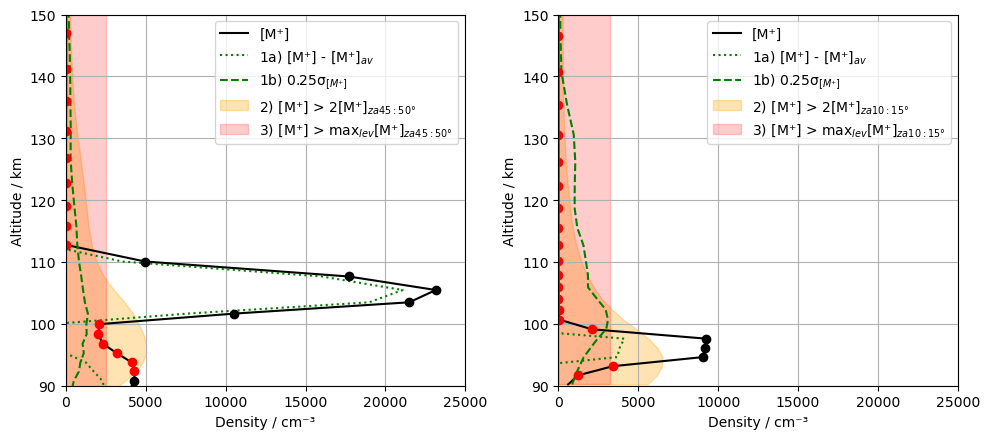

In [26]:

# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2, alt_sel2, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel2-Mptdens_nsavg_sel2), alt_sel2, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25*Mptdens_nsstd_sel2, alt_sel2, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)

axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2, 0, 2 * Mptdens_sel2, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2.values-2.5)}:{int(intlat_sel2.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel2)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2.values-2.5)}:{int(intlat_sel2.values+2.5)}\u00B0}}$')


for i in range(len(alt_sel2) - 1):
    if Mptdens_nsdiff_sel2[i] < 0.25*Mptdens_nsstd_sel2[i] or Mptdensns_sel2[i] < max_Mptdens_sel or Mptdensns_sel2[i] < 2 * Mptdens_sel2[i]:
        axes[0].plot(Mptdensns_sel2[i], alt_sel2[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2[i], alt_sel2[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')

axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1, alt_sel1, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel1-Mptdens_nsavg_sel1), alt_sel1, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25*Mptdens_nsstd_sel1, alt_sel1, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)

axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1, 0, 2 * Mptdens_sel1, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel1)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1) - 1):
    if Mptdens_nsdiff_sel1[i] < 0.25*Mptdens_nsstd_sel1[i] or Mptdensns_sel1[i] < max_Mptdens_sel or Mptdensns_sel1[i] < 2 * Mptdens_sel1[i]:
        axes[1].plot(Mptdensns_sel1[i], alt_sel1[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1[i], alt_sel1[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')

axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'{run_name}_Criteria_eg_Lat_{int(intlat_sel2.values-2.5)}-{int(intlat_sel2.values+2.5)}_and_{int(intlat_sel1.values-2.5)}-{int(intlat_sel1.values+2.5)}.png'
# plt.savefig(f'./Figures/SMax/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

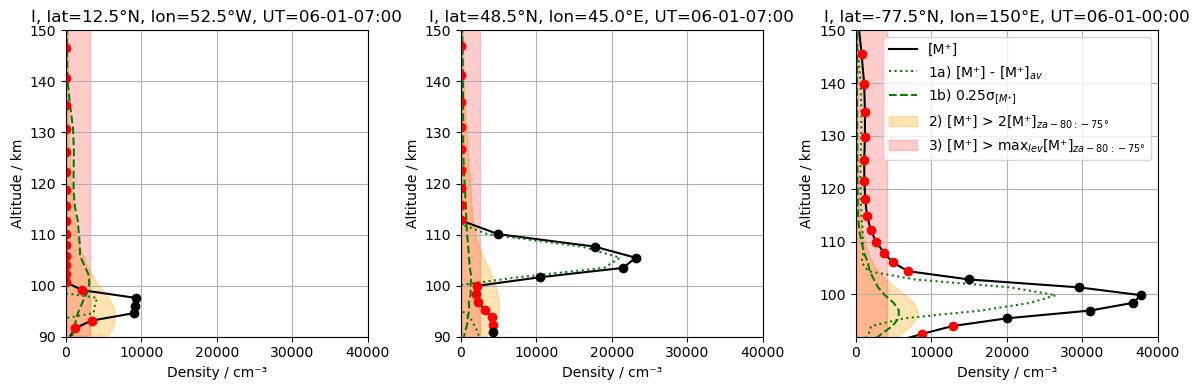

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# First subplot ==============================================================================

axes[1].plot(Mptdensns_sel2, alt_sel2, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel2 - Mptdens_nsavg_sel2), alt_sel2, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25 * Mptdens_nsstd_sel2, alt_sel2, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel2, 0, 2 * Mptdens_sel2, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2.values - 2.5)}:{int(intlat_sel2.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel2)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel2, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2.values - 2.5)}:{int(intlat_sel2.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel2) - 1):
    if Mptdens_nsdiff_sel2[i] < 0.25 * Mptdens_nsstd_sel2[i] or Mptdensns_sel2[i] < max_Mptdens_sel or Mptdensns_sel2[i] < 2 * Mptdens_sel2[i]:
        axes[1].plot(Mptdensns_sel2[i], alt_sel2[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel2[i], alt_sel2[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')
axes[1].set_ylabel('Altitude / km')
axes[1].grid(True)
axes[1].set_title('I, lat=48.5\u00b0N, lon=45.0\u00b0E, UT=06-01-07:00')

# Second subplot =============================================================================

axes[0].plot(Mptdensns_sel1, alt_sel1, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel1 - Mptdens_nsavg_sel1), alt_sel1, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25 * Mptdens_nsstd_sel1, alt_sel1, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel1, 0, 2 * Mptdens_sel1, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1.values - 2.5)}:{int(intlat_sel1.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel1)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel1, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1.values - 2.5)}:{int(intlat_sel1.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel1) - 1):
    if Mptdens_nsdiff_sel1[i] < 0.25 * Mptdens_nsstd_sel1[i] or Mptdensns_sel1[i] < max_Mptdens_sel or Mptdensns_sel1[i] < 2 * Mptdens_sel1[i]:
        axes[0].plot(Mptdensns_sel1[i], alt_sel1[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel1[i], alt_sel1[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')
axes[0].set_ylabel('Altitude / km')
axes[0].grid(True)
axes[0].set_title('I, lat=12.5\u00b0N, lon=52.5\u00b0W, UT=06-01-07:00')

# Third subplot =============================================================================

axes[2].plot(Mptdensns_sel3, alt_sel3, label='[M\u207A]', color='black')
axes[2].plot((Mptdensns_sel3 - Mptdens_nsavg_sel3), alt_sel3, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[2].plot(0.25 * Mptdens_nsstd_sel3, alt_sel3, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[2].set_ylim(92, WACCM_UL)
axes[2].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[2].fill_betweenx(alt_sel3, 0, 2 * Mptdens_sel3, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel3.values - 2.5)}:{int(intlat_sel3.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel3)

# Add a vertical line at the maximum value
axes[2].fill_betweenx(alt_sel3, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel3.values - 2.5)}:{int(intlat_sel3.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel3) - 1):
    if Mptdens_nsdiff_sel3[i] < 0.25 * Mptdens_nsstd_sel3[i] or Mptdensns_sel3[i] < max_Mptdens_sel or Mptdensns_sel3[i] < 2 * Mptdens_sel3[i]:
        axes[2].plot(Mptdensns_sel3[i], alt_sel3[i], 'ro')  # Plot red circles
    else:
        axes[2].plot(Mptdensns_sel3[i], alt_sel3[i], 'ko')  # Plot black circles

axes[2].set_xlabel('Density / cm\u207B\u00B3')
axes[2].set_ylabel('Altitude / km')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('I, lat=-77.5\u00b0N, lon=150\u00b0E, UT=06-01-00:00')
# ============================================================================================
plt.tight_layout()

figname = f'{run_name}_Criteria_eg_Lat_{int(intlat_sel2.values - 2.5)}-{int(intlat_sel2.values + 2.5)}_and_{int(intlat_sel1.values - 2.5)}-{int(intlat_sel1.values + 2.5)}_and_{int(intlat_sel3.values - 2.5)}-{int(intlat_sel3.values + 2.5)}.png'
# plt.savefig(f'./Figures/SMax/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat Line Plots (non magnetic coords)   *** TO PLOT USING fivedegbins=0 ***

In [28]:
factor = 2  #factor to divide COSMIC data by for easier comparison

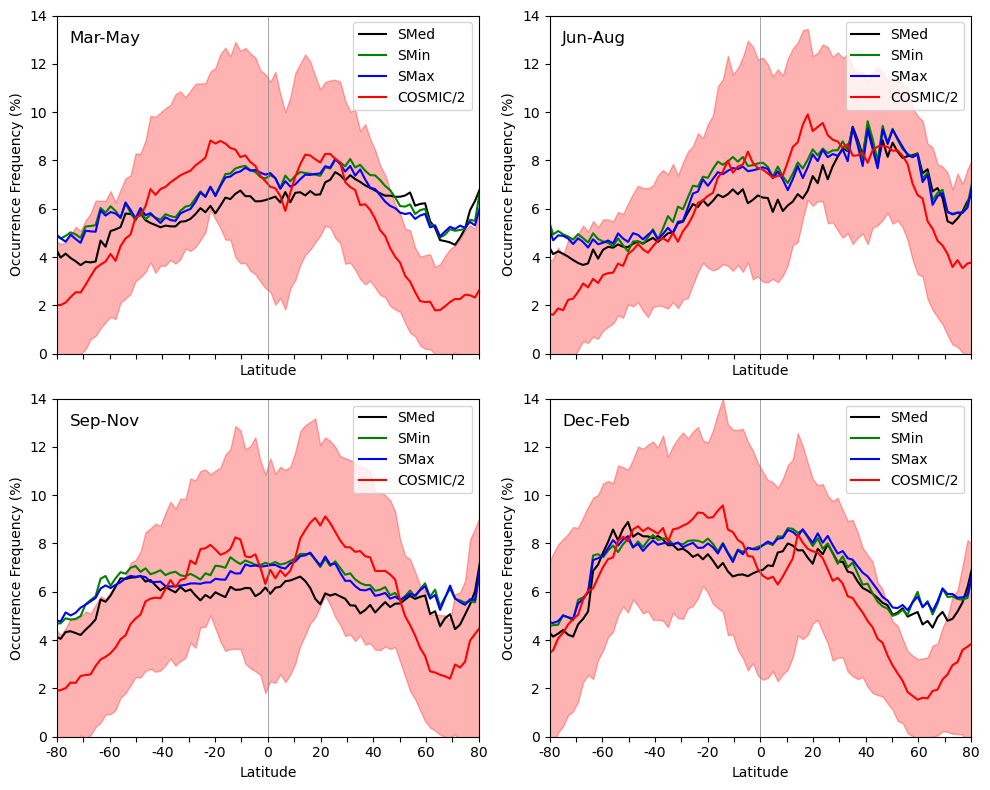

In [29]:
#======================================
# Using COSMIC data on lat-(lon) grid
#======================================

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot WACCM data
axes[0, 0].plot(lat, spr_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')
axes[0, 1].plot(lat, sum_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')
axes[1, 0].plot(lat, aut_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')
axes[1, 1].plot(lat, win_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')

# Plot WACCM data - SMin
axes[0, 0].plot(lat, min_spr_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')
axes[0, 1].plot(lat, min_sum_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')
axes[1, 0].plot(lat, min_aut_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')
axes[1, 1].plot(lat, min_win_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')

# Plot WACCM data - SMax
axes[0, 0].plot(lat, max_spr_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')
axes[0, 1].plot(lat, max_sum_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')
axes[1, 0].plot(lat, max_aut_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')
axes[1, 1].plot(lat, max_win_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')


# Plot COSMIC data with shaded error area
axes[0, 0].plot(lat_spr_lon, ocfr_spr_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
axes[0, 1].plot(lat_sum_lon, ocfr_sum_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
axes[1, 0].plot(lat_aut_lon, ocfr_aut_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
axes[1, 1].plot(lat_win_lon, ocfr_win_lon_mean /factor, color='red', label=f'COSMIC/{factor}')

# # Fill between upper and lower bounds of the error
axes[0, 0].fill_between(lat_spr_lon, (ocfr_spr_lon_mean.values - spr_stdev_lat.values) / factor, (ocfr_spr_lon_mean.values + spr_stdev_lat.values) / factor, color='red', alpha=0.3)
axes[0, 1].fill_between(lat_sum_lon, (ocfr_sum_lon_mean.values - sum_stdev_lat.values) / factor, (ocfr_sum_lon_mean.values + sum_stdev_lat.values) / factor, color='red', alpha=0.3)
axes[1, 0].fill_between(lat_aut_lon, (ocfr_aut_lon_mean.values - aut_stdev_lat.values) / factor, (ocfr_aut_lon_mean.values + aut_stdev_lat.values) / factor, color='red', alpha=0.3)
axes[1, 1].fill_between(lat_win_lon, (ocfr_win_lon_mean.values - win_stdev_lat.values) / factor, (ocfr_win_lon_mean.values + win_stdev_lat.values) / factor, color='red', alpha=0.3)


ylim_min = 0
ylim_max = 14


for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ax.legend()
    ax.set_ylim(ylim_min, ylim_max)

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')
        
plt.tight_layout()

figname = None
if fivedegbins == 1:
    figname = f'{run_name}_Lat_5d_f-{factor}.png'
else:
    figname = f'{run_name}_Lat_f-{factor}.png'
    
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


# NEW FIVEDEGREEBINS SWITCH

In [30]:
fivedegbins = 1

# Lat - Lon

In [31]:
# Define the MidpointNormalize class for diverging colorbar normalization
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work their way either side from a prescribed midpoint value.
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# taken out magnetic latitude contours for now 

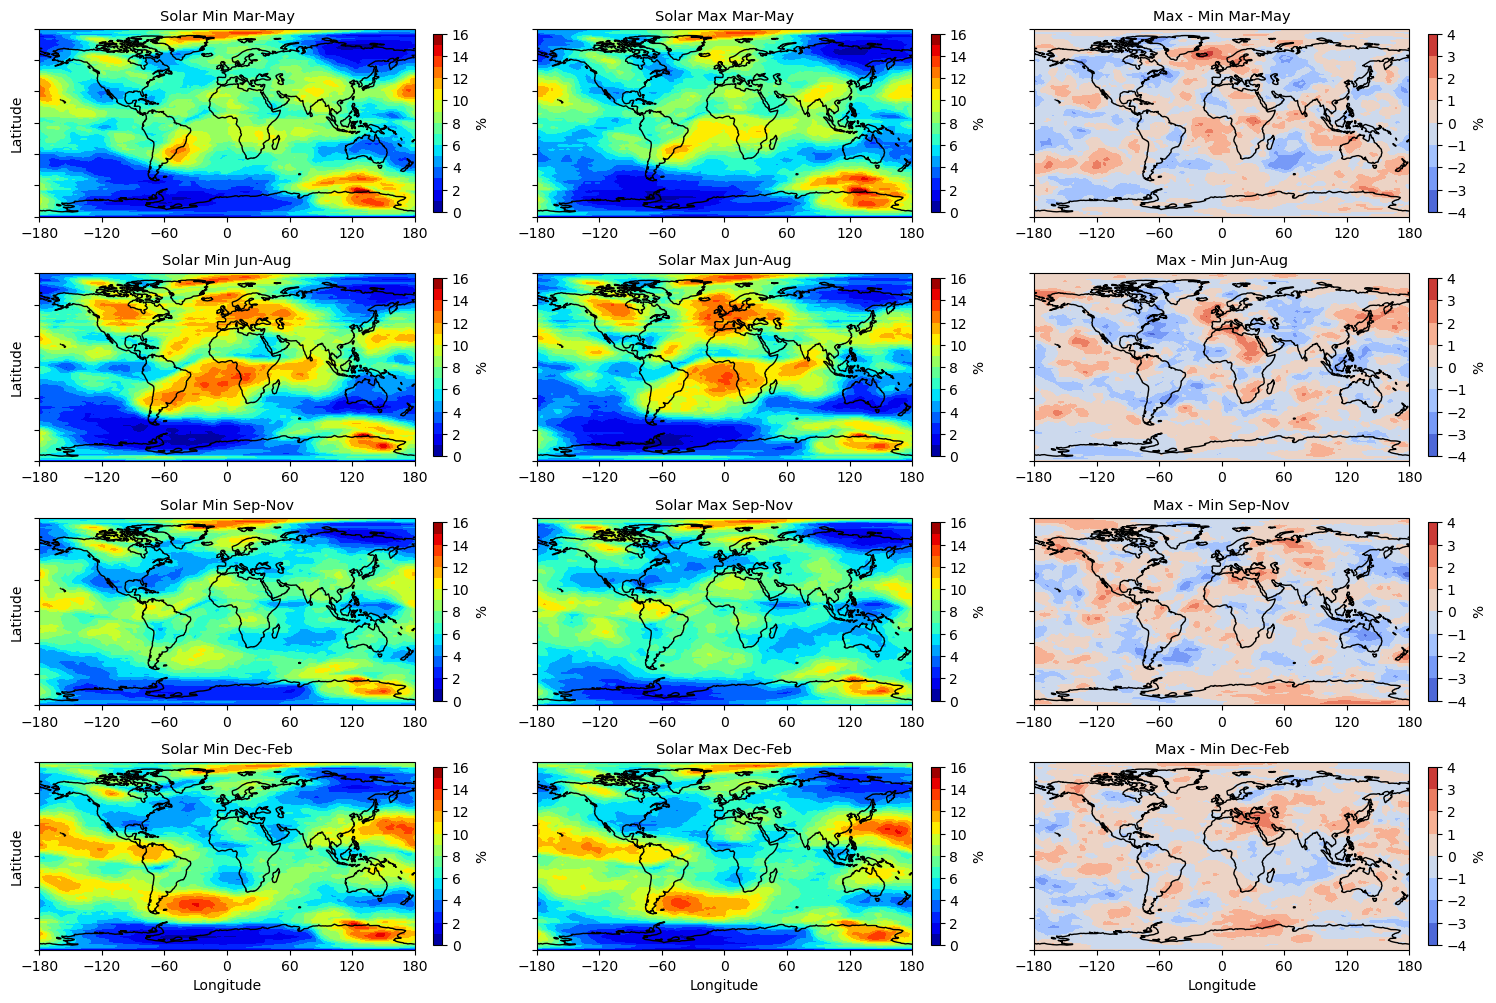

In [38]:
# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 11),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

cmap = plt.get_cmap('jet')

# Data for plotting
min_subplots = [min_spr_SpEsns_Occ_Freq_llav, min_sum_SpEsns_Occ_Freq_llav,
                min_aut_SpEsns_Occ_Freq_llav, min_win_SpEsns_Occ_Freq_llav]

max_subplots = [max_spr_SpEsns_Occ_Freq_llav, max_sum_SpEsns_Occ_Freq_llav,
                max_aut_SpEsns_Occ_Freq_llav, max_win_SpEsns_Occ_Freq_llav]

titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin = 0
vmax = 16
nolevs = (vmax - vmin) + 1


for i, (min_data, max_data) in enumerate(zip(min_subplots, max_subplots)):
    row = i

    # Column 1: Min data
    ax_min = axes[row, 0]
    C_min = ax_min.contourf(lon_plot, lat, min_data, cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    # Add magnetic latitude contours
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    # contour = ax_min.contour(ALon, ALat, ALATM[0, :, :],  # Ensure ALATM matches your data dimensions
                   # transform=ccrs.PlateCarree(),
                   # colors='black',
                   # levels=contour_levels,
                   # linestyles='solid',
                   # linewidths=0.5)

    # clabels = ax_diff.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_min.set_xlabel('Longitude')
    ax_min.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_min.set_ylabel('Latitude')
    ax_min.set_yticks(np.linspace(-90, 90, 7))
    ax_min.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
    
    cbar = fig.colorbar(C_min, ax=ax_min, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_min.coastlines()
    ax_min.set_title(f'Solar Min {titles[i]}', fontsize=10.5)

    # Column 2: Max data
    ax_max = axes[row, 1]
    C_max = ax_max.contourf(lon_plot, lat, max_data, cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    # Add magnetic latitude contours
    # contour = ax_max.contour(ALon, ALat, ALATM[0, :, :],
                   # transform=ccrs.PlateCarree(),
                   # colors='black',
                   # levels=contour_levels,
                   # linestyles='solid',
                   # linewidths=0.5)

    # clabels = ax_diff.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_max.set_xlabel('Longitude')
    ax_max.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_max.set_yticks(np.linspace(-90, 90, 7))
    ax_max.set_yticklabels([])  # Remove y-tick labels for middle column
    
    cbar = fig.colorbar(C_max, ax=ax_max, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_max.coastlines()
    ax_max.set_title(f'Solar Max {titles[i]}', fontsize=10.5)

    # Column 3: % Difference (Max - Min)  with diverging colormap
    vmindiff = -4
    vmaxdiff = 4
    nolevsdiff = 9
    
    ax_diff = axes[row, 2]
    diff = (max_data - min_data) 
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff, vmax=vmaxdiff)
    cmap_diff = plt.get_cmap('coolwarm')  # Choose a diverging colormap

    C_diff = ax_diff.contourf(lon_plot, lat, diff, cmap=cmap_diff,
                              levels=np.linspace(vmindiff, vmaxdiff, nolevsdiff), norm=norm
                             )

    # Add magnetic latitude contours
    # contour = ax_diff.contour(ALon, ALat, ALATM[0, :, :],
                    # transform=ccrs.PlateCarree(),
                    # colors='black',
                    # levels=contour_levels,
                    # linestyles='solid',
                    # linewidths=0.5)

    # clabels = ax_diff.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_diff.set_xlabel('Longitude')
        
    ax_diff.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_diff.set_yticks(np.linspace(-90, 90, 7))
    #ax_diff.set_yticklabels([])  # Remove y-tick labels for right column
    
    cbar = fig.colorbar(C_diff, ax=ax_diff, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_diff.coastlines()
    ax_diff.set_title(f'Max - Min {titles[i]}', fontsize=10.5)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_LatLon_diff.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


In [39]:

diff_spr = max_spr_SpEsns_Occ_Freq_llav - min_spr_SpEsns_Occ_Freq_llav
diff_sum = max_sum_SpEsns_Occ_Freq_llav - min_sum_SpEsns_Occ_Freq_llav
diff_aut = max_aut_SpEsns_Occ_Freq_llav - min_aut_SpEsns_Occ_Freq_llav
diff_win = max_win_SpEsns_Occ_Freq_llav - min_win_SpEsns_Occ_Freq_llav

diff_spr_lat = diff_spr.mean(dim='lon')
diff_sum_lat = diff_sum.mean(dim='lon')
diff_aut_lat = diff_aut.mean(dim='lon')
diff_win_lat = diff_win.mean(dim='lon')

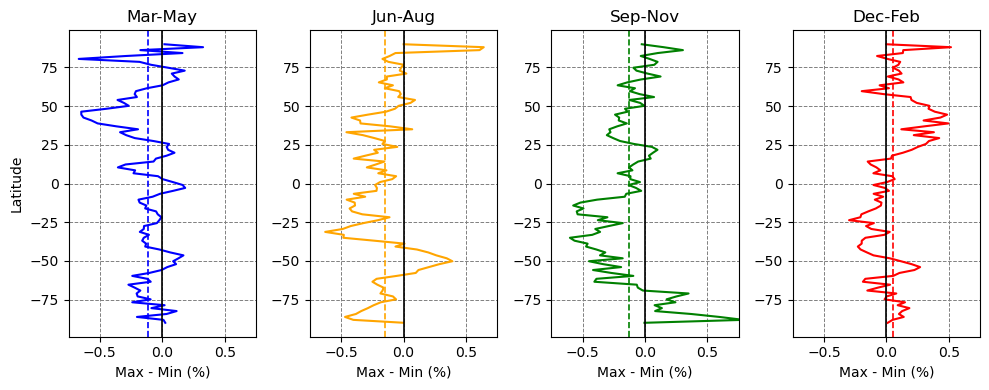

In [40]:
import matplotlib.pyplot as plt
import numpy as np

lat_values = lat.values  # Assuming lat is an xarray DataArray

# Create a new figure with 4 subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4), sharex=True)

# Define grid line style
grid_style = {'color': 'gray', 'linestyle': '--', 'linewidth': 0.7}
zero_lat_style = {'color': 'black', 'linestyle': '-', 'linewidth': 1.2}

# Calculate the average value for each dataset
avg_values = [np.mean(data) for data in [diff_spr_lat, diff_sum_lat, diff_aut_lat, diff_win_lat]]

# Plot each season on a separate subplot
for ax, data, title, color, avg in zip(axes, 
                                       [diff_spr_lat, diff_sum_lat, diff_aut_lat, diff_win_lat], 
                                       ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb'], 
                                       ['blue', 'orange', 'green', 'red'],
                                       avg_values):
    
    ax.plot(data, lat_values, color=color)
    ax.set_title(title)
    ax.set_xlabel('Max - Min (%)')
    ax.set_xlim(-0.75, 0.75)
    ax.grid(True, **grid_style)
    ax.axvline(0, color=zero_lat_style['color'], linestyle=zero_lat_style['linestyle'], linewidth=zero_lat_style['linewidth'])
    
    # Plot the average value as a vertical line in the same color
    ax.axvline(avg, color=color, linestyle='--', linewidth=1.2)

axes[0].set_ylabel('Latitude')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
figname = f'{run_name}_Lat_Lonavg_diffs.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')

# Show the plot
plt.show()


# Lat - LT - all levs

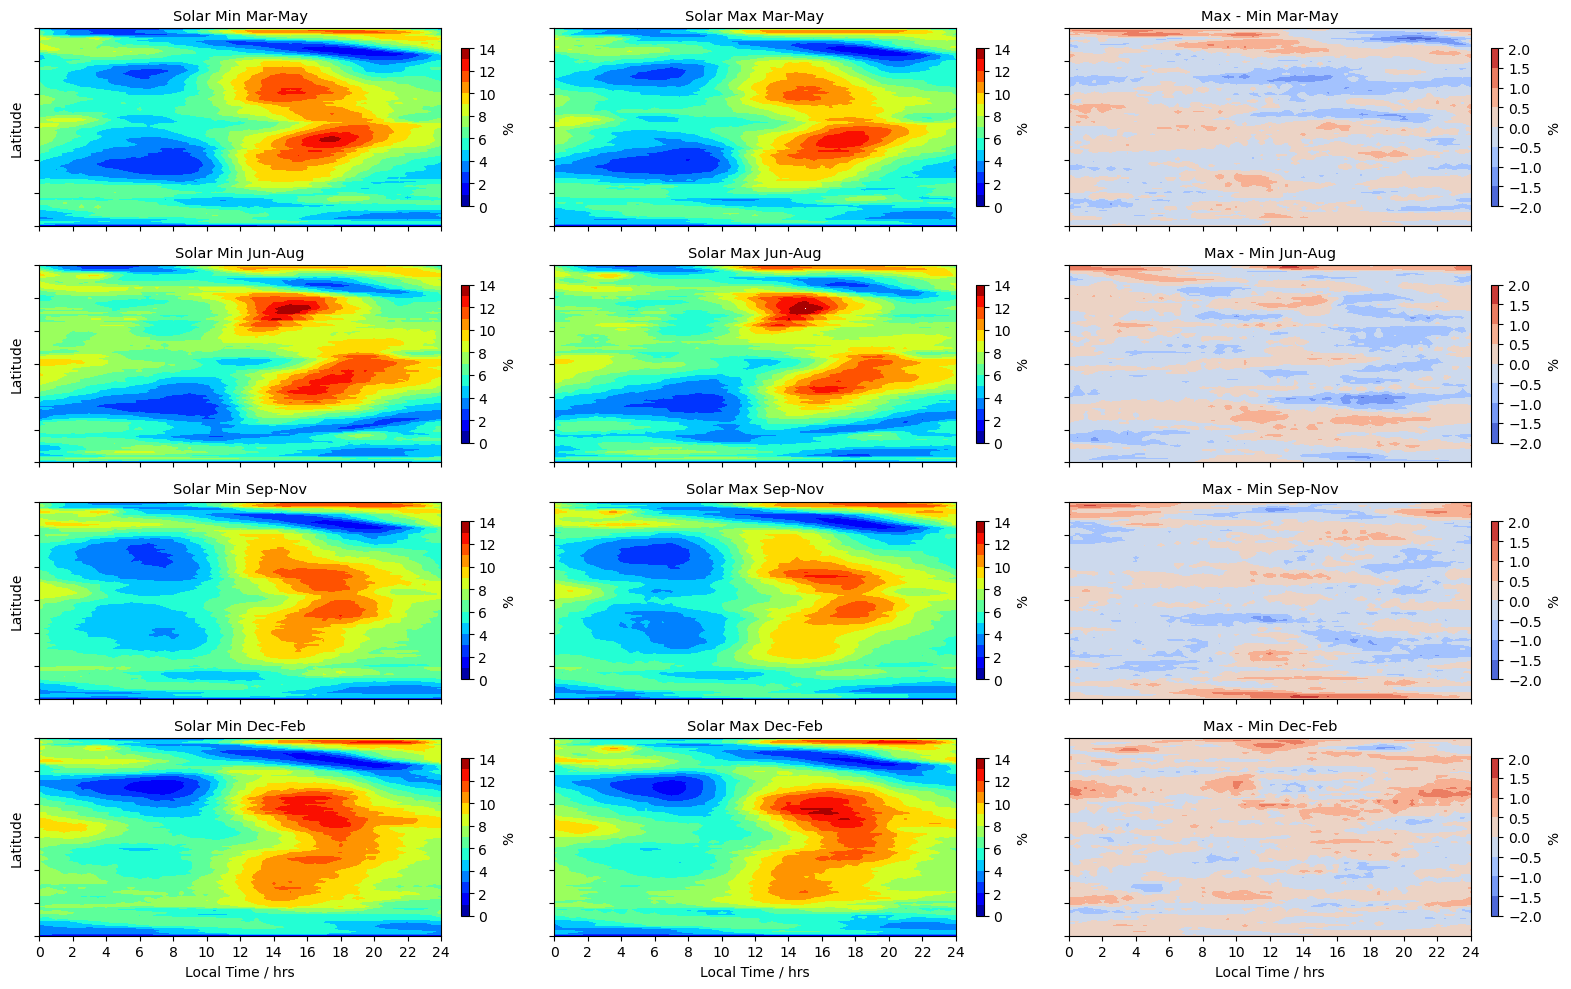

In [41]:
# Define the new data arrays for min, max, and percentage difference
min_subplots = [min_spr_SpEs_Occ_Freq_llbav, min_sum_SpEs_Occ_Freq_llbav, min_aut_SpEs_Occ_Freq_llbav, min_win_SpEs_Occ_Freq_llbav]
max_subplots = [max_spr_SpEs_Occ_Freq_llbav, max_sum_SpEs_Occ_Freq_llbav, max_aut_SpEs_Occ_Freq_llbav, max_win_SpEs_Occ_Freq_llbav]

# Define the percentage difference as (max - min) / min * 100
diff_subplots = [(max_data - min_data) for max_data, min_data in zip(max_subplots, min_subplots)]

titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin = 0
vmax = 14
nolevs = (vmax - vmin) + 1
cmap = plt.get_cmap('jet')

fig_combined, axes_combined = plt.subplots(nrows=4, ncols=3, figsize=(16, 10),
                                           sharex=True, sharey=True)

for i, (min_data, max_data, diff_data) in enumerate(zip(min_subplots, max_subplots, diff_subplots)):
    row = i

    # Column 1: Min data
    ax_min = axes_combined[row, 0]
    C_min = ax_min.contourf(timeplot, lat, np.concatenate((min_data, min_data[:, :1]), axis=1), cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    if row == 3:
        ax_min.set_xlabel('Local Time / hrs')
    ax_min.set_xticks(np.linspace(0, 24, 13))
    ax_min.set_ylabel('Latitude')
    ax_min.set_yticks(np.linspace(-90, 90, 7))
    ax_min.set_yticklabels([-90, -60, -30, 0, 30, 60, 90])
    
    cbar_min = fig_combined.colorbar(C_min, ax=ax_min, pad=0.04, shrink=0.8)
    cbar_min.set_label(r'%')
    ax_min.set_title(f'Solar Min {titles[i]}', fontsize=10.5)

    # Column 2: Max data
    ax_max = axes_combined[row, 1]
    C_max = ax_max.contourf(timeplot, lat, np.concatenate((max_data, max_data[:, :1]), axis=1), cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax
                           )

    if row == 3:
        ax_max.set_xlabel('Local Time / hrs')
    ax_max.set_xticks(np.linspace(0, 24, 13))
    ax_max.set_yticks(np.linspace(-90, 90, 7))
    ax_max.set_yticklabels([])  # Remove y-tick labels for middle column
    
    cbar_max = fig_combined.colorbar(C_max, ax=ax_max, pad=0.04, shrink=0.8)
    cbar_max.set_label(r'%')
    ax_max.set_title(f'Solar Max {titles[i]}', fontsize=10.5)

    # Column 3: Difference (Max - Min) 
    
    vmindiff = -2
    vmaxdiff = 2
    nolevsdiff = 9
    
    ax_diff = axes_combined[row, 2]
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff, vmax=vmaxdiff)
    C_diff = ax_diff.contourf(timeplot, lat, np.concatenate((diff_data, diff_data[:, :1]), axis=1), cmap='coolwarm' 
                              ,levels=np.linspace(vmindiff, vmaxdiff, nolevsdiff)
                              , norm=norm)

    if row == 3:
        ax_diff.set_xlabel('Local Time / hrs')
    ax_diff.set_xticks(np.linspace(0, 24, 13))
    ax_diff.set_yticks(np.linspace(-90, 90, 7))
    ax_diff.set_yticklabels([])  # Remove y-tick labels for right column
    
    cbar_diff = fig_combined.colorbar(C_diff, ax=ax_diff, pad=0.04, shrink=0.8)
    cbar_diff.set_label(r'%')
    ax_diff.set_title(f'Max - Min {titles[i]}', fontsize=10.5)

plt.tight_layout()

figname = f'{run_name}_LatLT_diff.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Alt - Lat

In [42]:

# Create DataArrays with the 'season' coordinate
SpEs_spr_alt_lat = xr.DataArray(SpEs_spr_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat = xr.DataArray(SpEs_sum_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat = xr.DataArray(SpEs_aut_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat = xr.DataArray(SpEs_win_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

SpEs_spr_alt_lat_min = xr.DataArray(SpEs_spr_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat_min = xr.DataArray(SpEs_sum_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat_min = xr.DataArray(SpEs_aut_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat_min = xr.DataArray(SpEs_win_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

SpEs_spr_alt_lat_max = xr.DataArray(SpEs_spr_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat_max = xr.DataArray(SpEs_sum_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat_max = xr.DataArray(SpEs_aut_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat_max = xr.DataArray(SpEs_win_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

# Concatenate all datasets along the 'season' dimension
combined_all = xr.concat([
    SpEs_spr_alt_lat, SpEs_sum_alt_lat, SpEs_aut_alt_lat, SpEs_win_alt_lat,
    SpEs_spr_alt_lat_min, SpEs_sum_alt_lat_min, SpEs_aut_alt_lat_min, SpEs_win_alt_lat_min,
    SpEs_spr_alt_lat_max, SpEs_sum_alt_lat_max, SpEs_aut_alt_lat_max, SpEs_win_alt_lat_max
], dim='season')

# Calculate the overall min and max values across all datasets
overall_min = combined_all.min(dim=['season', 'lev_sl', 'lat'])
overall_max = combined_all.max(dim=['season', 'lev_sl', 'lat'])

# Normalize each season's data using the overall min and max values

# Solar Med
SpEs_spr_alt_lat_norm = (SpEs_spr_alt_lat - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_norm = (SpEs_sum_alt_lat - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_norm = (SpEs_aut_alt_lat - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_norm = (SpEs_win_alt_lat - overall_min) / (overall_max - overall_min)

# Solar Min
SpEs_spr_alt_lat_min_norm = (SpEs_spr_alt_lat_min - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_min_norm = (SpEs_sum_alt_lat_min - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_min_norm = (SpEs_aut_alt_lat_min - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_min_norm = (SpEs_win_alt_lat_min - overall_min) / (overall_max - overall_min)

# Solar Max
SpEs_spr_alt_lat_max_norm = (SpEs_spr_alt_lat_max - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_max_norm = (SpEs_sum_alt_lat_max - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_max_norm = (SpEs_aut_alt_lat_max - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_max_norm = (SpEs_win_alt_lat_max - overall_min) / (overall_max - overall_min)


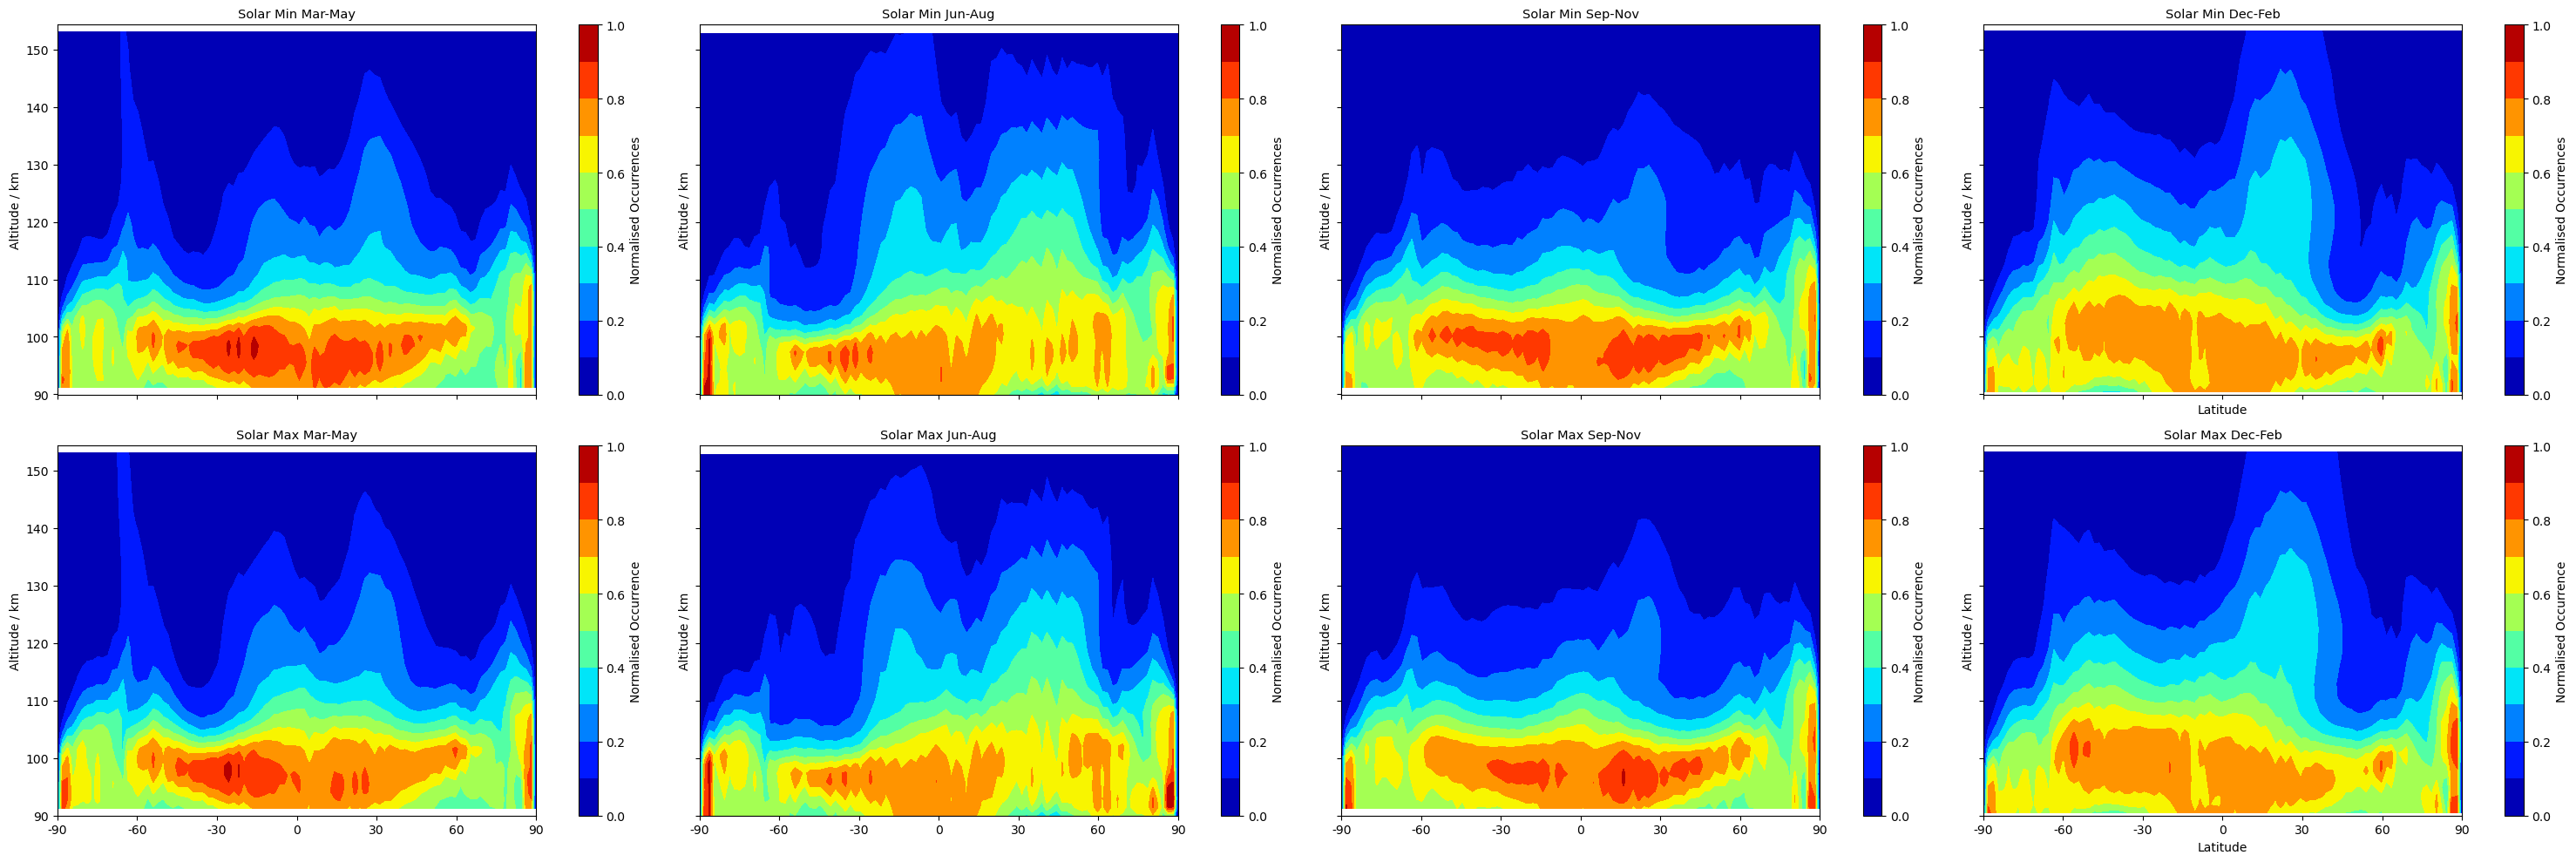

In [65]:
# Define the parameters for plotting
vmin = 0
vmax = 1
nolevs = 11

vmindiff = -0.25
vmaxdiff = 0.25
nolevsdiff = 11

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,10), sharex=True, sharey=True)

# Define the data for each plot
subplots_min = [SpEs_spr_alt_lat_min_norm, SpEs_sum_alt_lat_min_norm, SpEs_aut_alt_lat_min_norm, SpEs_win_alt_lat_min_norm]
subplots_max = [SpEs_spr_alt_lat_max_norm, SpEs_sum_alt_lat_max_norm, SpEs_aut_alt_lat_max_norm, SpEs_win_alt_lat_max_norm]
subplots_diff = [(max_data - min_data) for max_data, min_data in zip(subplots_max, subplots_min)]

# Define the altitudes for each plot
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

# Define the titles for each plot
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Plot the data for solar min, solar max, and their difference
for i in range(4):
    # Solar Min
    ax_min = axes[0, i]
    alts_plot = alts_waccm[i]
    C_min = ax_min.contourf(lat, alts_plot, subplots_min[i], cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)
    if i == 3:
        ax_min.set_xlabel('Latitude')
        ax_min.set_xticks(np.linspace(-90, 90, 7))
        ax_min.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax_min.set_xticks([])  
    ax_min.set_ylabel('Altitude / km')
    cbar_min = fig.colorbar(C_min, ax=ax_min, pad=0.07)
    cbar_min.set_label(r'Normalised Occurrences')
    ax_min.set_title(f'Solar Min {titles[i]}', fontsize=10.5)
    
    # Solar Max
    ax_max = axes[1, i]
    C_max = ax_max.contourf(lat, alts_plot, subplots_max[i], cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)
    if i == 3:
        ax_max.set_xlabel('Latitude')
        ax_max.set_xticks(np.linspace(-90, 90, 7))
        ax_max.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax_max.set_xticks([])  
    ax_max.set_ylabel('Altitude / km')
    cbar_max = fig.colorbar(C_max, ax=ax_max, pad=0.07)
    cbar_max.set_label(r'Normalised Occurrence')
    ax_max.set_title(f'Solar Max {titles[i]}', fontsize=10.5)

# Adjust layout and save the figure
# plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
plt.tight_layout()
figname = f'{run_name}_Diff_AltLat_norm.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


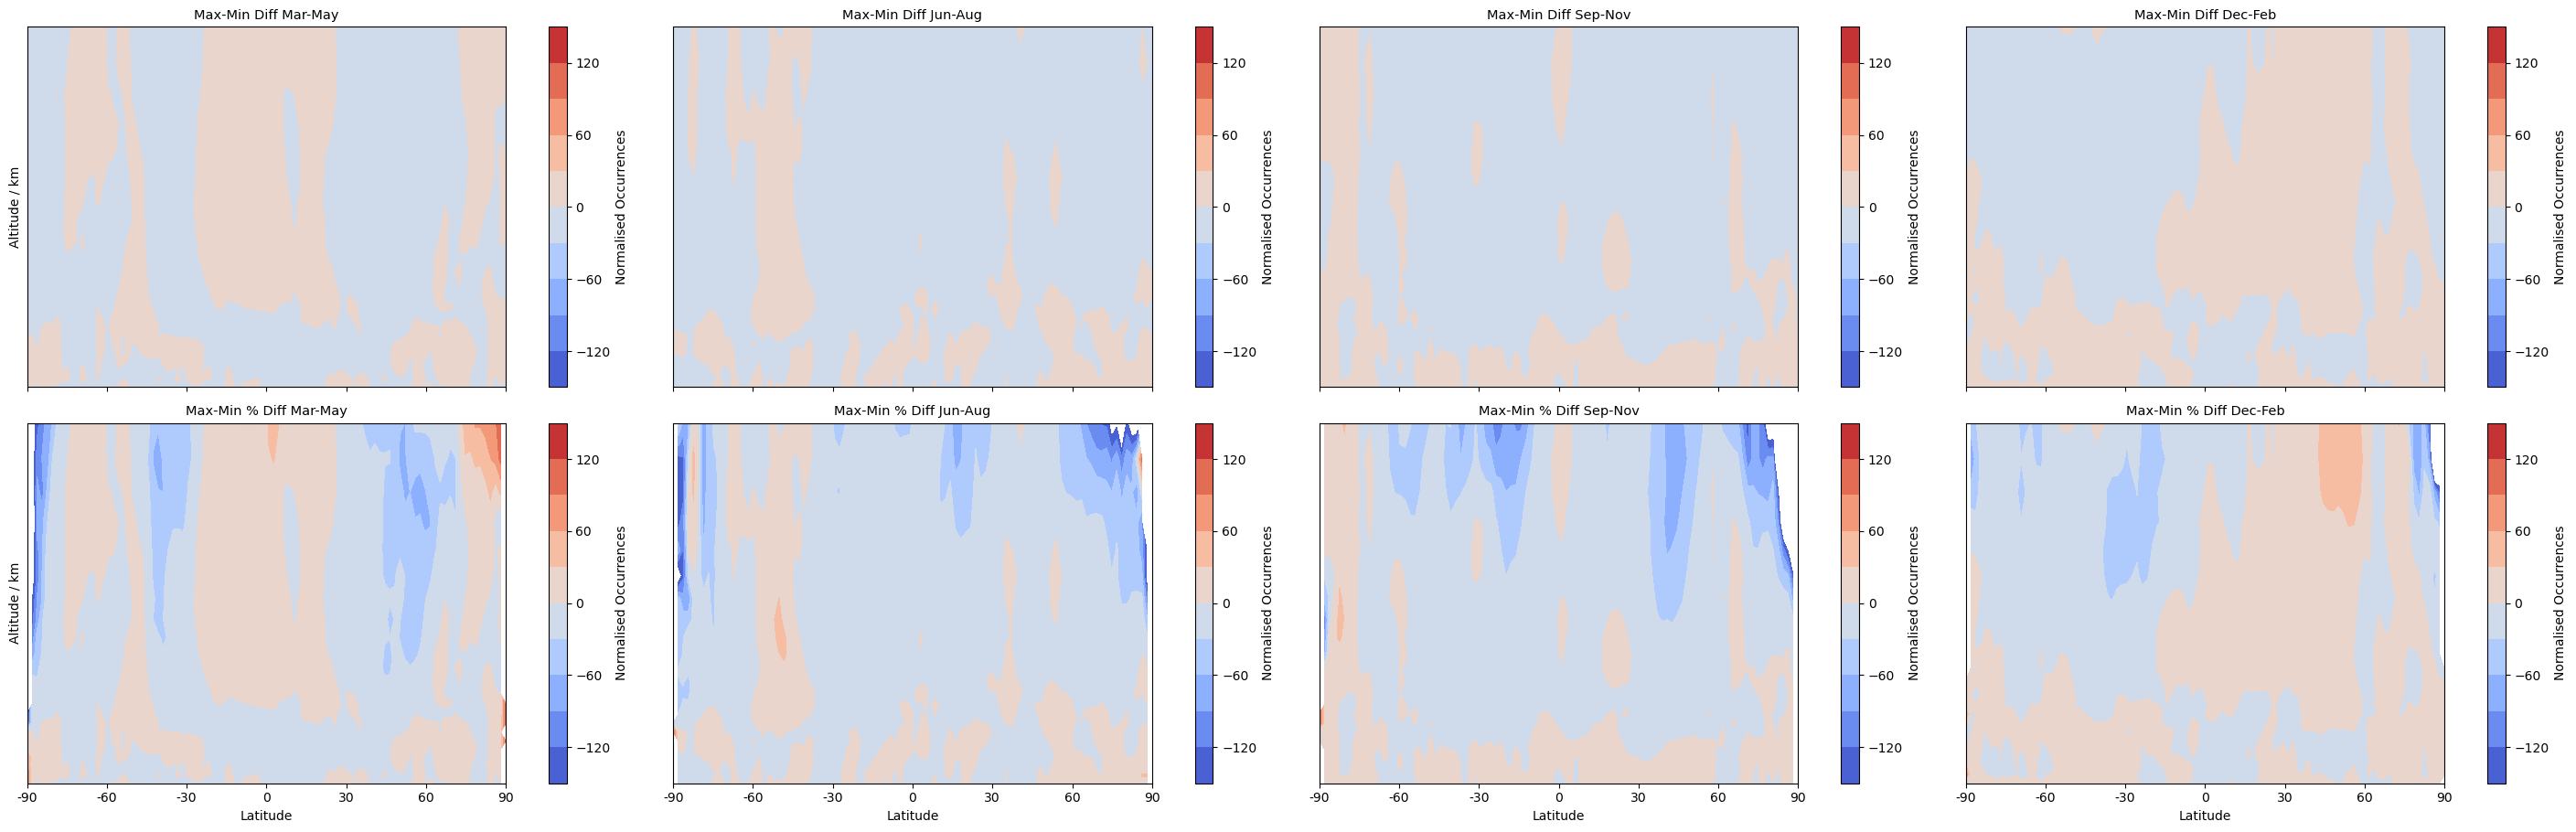

In [92]:
# Define the parameters for plotting
vmin = 0
vmax = 1
nolevs = 11

vmindiff = -150  # 0.25
vmaxdiff = 150   # 0.25
nolevsdiff = 11

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharex=True, sharey=True)

# Define the data for each plot
subplots_min = [SpEs_spr_alt_lat_min_norm, SpEs_sum_alt_lat_min_norm, SpEs_aut_alt_lat_min_norm, SpEs_win_alt_lat_min_norm]
subplots_max = [SpEs_spr_alt_lat_max_norm, SpEs_sum_alt_lat_max_norm, SpEs_aut_alt_lat_max_norm, SpEs_win_alt_lat_max_norm]
subplots_diff = [(max_data - min_data) for max_data, min_data in zip(subplots_max, subplots_min)]
subplots_diff_percent = [((max_data - min_data) / max_data) * 100 for max_data, min_data in zip(subplots_max, subplots_min)]

# Define the altitudes for each plot
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

# Define the titles for each plot
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Plot the data for solar min, solar max, and their difference
for i in range(4):

    # Max-Min Difference
    ax_diff = axes[0, i]
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff, vmax=vmaxdiff)
    C_diff = ax_diff.contourf(lat, alts_plot, subplots_diff[i], cmap='coolwarm',
                              levels=np.linspace(vmindiff, vmaxdiff, nolevsdiff), vmin=vmindiff, vmax=vmaxdiff,
                              norm=norm)
    
    if i == 0:
        ax_diff.set_ylabel('Altitude / km')  # Add y-axis label for the first column only

    cbar_diff = fig.colorbar(C_diff, ax=ax_diff, pad=0.07)
    cbar_diff.set_label(r'Normalised Occurrences')
    ax_diff.set_title(f'Max-Min Diff {titles[i]}', fontsize=10.5)

    # Max-Min Difference Percentage
    ax_diff_percent = axes[1, i]
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff, vmax=vmaxdiff)
    C_diff_percent = ax_diff_percent.contourf(lat, alts_plot, subplots_diff_percent[i], cmap='coolwarm',
                                              levels=np.linspace(vmindiff, vmaxdiff, nolevsdiff), vmin=vmindiff, vmax=vmaxdiff,
                                              norm=norm)
    
    if i == 0:
        ax_diff_percent.set_ylabel('Altitude / km')  # Add y-axis label for the first column only

    if i > 0:
        ax_diff_percent.set_yticks([])  # Remove y-axis labels for non-first columns

    # Assign the colorbar to the bottom row correctly
    cbar_diff_percent = fig.colorbar(C_diff_percent, ax=ax_diff_percent, pad=0.07)
    cbar_diff_percent.set_label(r'Normalised Occurrences')
    ax_diff_percent.set_title(f'Max-Min % Diff {titles[i]}', fontsize=10.5)

    # Add x-axis labels only for the bottom row
    ax_diff_percent.set_xlabel('Latitude')
    ax_diff_percent.set_xticks(np.linspace(-90, 90, 7))
    ax_diff_percent.set_xticklabels([-90, -60, -30, 0, 30, 60, 90])

# Adjust layout and save the figure
plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
figname = f'{run_name}_Diff_AltLat_norm.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


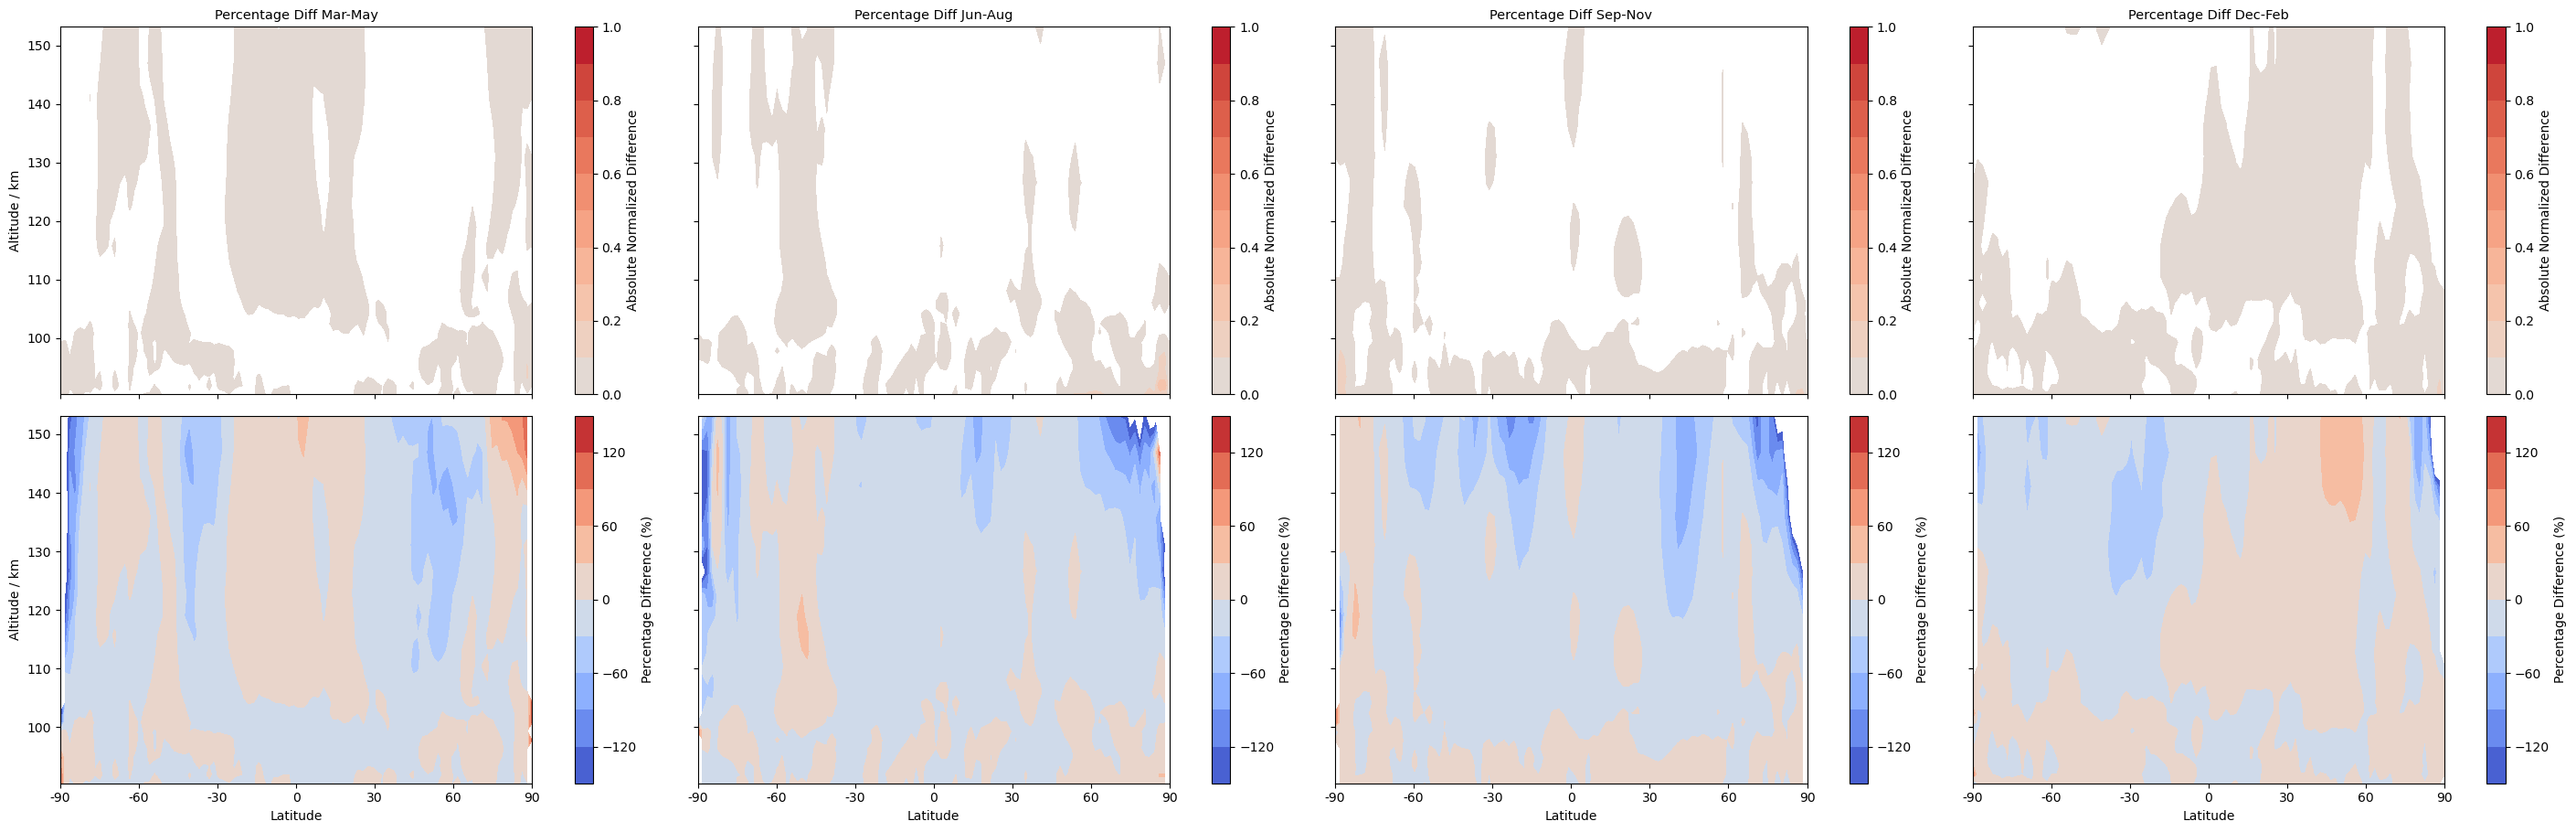

In [95]:
# Define the parameters for plotting
vmin_abs = 0      # For absolute differences
vmax_abs = 1
nolevs_abs = 11

vmin_perc = -150  # For percentage differences
vmax_perc = 150
nolevs_perc = 11

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharex=True, sharey=True)

# Define the data for each plot
subplots_min = [SpEs_spr_alt_lat_min_norm, SpEs_sum_alt_lat_min_norm, SpEs_aut_alt_lat_min_norm, SpEs_win_alt_lat_min_norm]
subplots_max = [SpEs_spr_alt_lat_max_norm, SpEs_sum_alt_lat_max_norm, SpEs_aut_alt_lat_max_norm, SpEs_win_alt_lat_max_norm]
subplots_diff = [(max_data - min_data) for max_data, min_data in zip(subplots_max, subplots_min)]
subplots_diff_percent = [((max_data - min_data) / max_data) * 100 for max_data, min_data in zip(subplots_max, subplots_min)]

# Define the titles for each plot
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Plot the data
for i in range(4):
    # Top row: Absolute Normalized Difference
    ax_abs = axes[0, i]
    norm_abs = MidpointNormalize(midpoint=0, vmin=vmin_abs, vmax=vmax_abs)
    C_abs = ax_abs.contourf(lat, alts_plot, subplots_diff[i], cmap='coolwarm',
                            levels=np.linspace(vmin_abs, vmax_abs, nolevs_abs), vmin=vmin_abs, vmax=vmax_abs,
                            norm=norm_abs)
    
    if i == 0:
        ax_abs.set_ylabel('Altitude / km')  # Add y-axis label for the first column only
    
    cbar_abs = fig.colorbar(C_abs, ax=ax_abs, pad=0.07)
    cbar_abs.set_label(r'Absolute Normalized Difference')
    ax_abs.set_title(f'Absolute Diff {titles[i]}', fontsize=10.5)

    # Bottom row: Percentage Difference
    ax_perc = axes[1, i]
    norm_perc = MidpointNormalize(midpoint=0, vmin=vmin_perc, vmax=vmax_perc)
    C_perc = ax_perc.contourf(lat, alts_plot, subplots_diff_percent[i], cmap='coolwarm',
                              levels=np.linspace(vmin_perc, vmax_perc, nolevs_perc), vmin=vmin_perc, vmax=vmax_perc,
                              norm=norm_perc)
    
    if i == 0:
        ax_perc.set_ylabel('Altitude / km')  # Add y-axis label for the first column only
    
    cbar_perc = fig.colorbar(C_perc, ax=ax_perc, pad=0.07)
    cbar_perc.set_label(r'Percentage Difference (%)')
    ax_abs.set_title(f'Percentage Diff {titles[i]}', fontsize=10.5)


    # Add x-axis labels only for the bottom row
    ax_perc.set_xlabel('Latitude')
    ax_perc.set_xticks(np.linspace(-90, 90, 7))
    ax_perc.set_xticklabels([-90, -60, -30, 0, 30, 60, 90])

# Adjust layout and save the figure
plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
figname = f'{run_name}_Diff_AltLat_norm.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


# Alt - LT

In [47]:
# Latitude bands
lat_band = ['15-20', '45-50']
solar_conditions = ['med', 'min', 'max']

#-------------------------------------------------------------------------------------------------------------------------------------------
# SOLAR MED
#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20 = np.where((intlat >= 15) & (intlat <= 20))[0]
ind_45_50 = np.where((intlat >= 45) & (intlat <= 50))[0]

SpEs_spr_15_20 = np.squeeze(tot_SpEs_spr_5deg[:, ind_15_20, :])
SpEs_sum_15_20 = np.squeeze(tot_SpEs_sum_5deg[:, ind_15_20, :])
SpEs_aut_15_20 = np.squeeze(tot_SpEs_aut_5deg[:, ind_15_20, :])
SpEs_win_15_20 = np.squeeze(tot_SpEs_win_5deg[:, ind_15_20, :])

SpEs_spr_45_50 = np.squeeze(tot_SpEs_spr_5deg[:, ind_45_50, :])
SpEs_sum_45_50 = np.squeeze(tot_SpEs_sum_5deg[:, ind_45_50, :])
SpEs_aut_45_50 = np.squeeze(tot_SpEs_aut_5deg[:, ind_45_50, :])
SpEs_win_45_50 = np.squeeze(tot_SpEs_win_5deg[:, ind_45_50, :])

# Create DataArrays with the 'season', 'lat_band', and 'solar_condition' coordinates
SpEs_spr_altLT_15_20_med = xr.DataArray(SpEs_spr_15_20, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '15-20', 'solar_condition': 'med'})
SpEs_sum_altLT_15_20_med = xr.DataArray(SpEs_sum_15_20, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '15-20', 'solar_condition': 'med'})
SpEs_aut_altLT_15_20_med = xr.DataArray(SpEs_aut_15_20, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '15-20', 'solar_condition': 'med'})
SpEs_win_altLT_15_20_med = xr.DataArray(SpEs_win_15_20, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '15-20', 'solar_condition': 'med'})

SpEs_spr_altLT_45_50_med = xr.DataArray(SpEs_spr_45_50, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '45-50', 'solar_condition': 'med'})
SpEs_sum_altLT_45_50_med = xr.DataArray(SpEs_sum_45_50, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '45-50', 'solar_condition': 'med'})
SpEs_aut_altLT_45_50_med = xr.DataArray(SpEs_aut_45_50, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '45-50', 'solar_condition': 'med'})
SpEs_win_altLT_45_50_med = xr.DataArray(SpEs_win_45_50, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '45-50', 'solar_condition': 'med'})

combined_med_15_20 = xr.concat([SpEs_spr_altLT_15_20_med, SpEs_sum_altLT_15_20_med, SpEs_aut_altLT_15_20_med, SpEs_win_altLT_15_20_med], dim='season')
combined_med_45_50 = xr.concat([SpEs_spr_altLT_45_50_med, SpEs_sum_altLT_45_50_med, SpEs_aut_altLT_45_50_med, SpEs_win_altLT_45_50_med], dim='season')
combined_med_all = xr.concat([combined_med_15_20, combined_med_45_50], dim='lat_band')

#-------------------------------------------------------------------------------------------------------------------------------------------
# SOLAR MIN
#-------------------------------------------------------------------------------------------------------------------------------------------

SpEs_spr_15_20_min = np.squeeze(tot_SpEs_spr_5deg_min[:, ind_15_20, :])
SpEs_sum_15_20_min = np.squeeze(tot_SpEs_sum_5deg_min[:, ind_15_20, :])
SpEs_aut_15_20_min = np.squeeze(tot_SpEs_aut_5deg_min[:, ind_15_20, :])
SpEs_win_15_20_min = np.squeeze(tot_SpEs_win_5deg_min[:, ind_15_20, :])

SpEs_spr_45_50_min = np.squeeze(tot_SpEs_spr_5deg_min[:, ind_45_50, :])
SpEs_sum_45_50_min = np.squeeze(tot_SpEs_sum_5deg_min[:, ind_45_50, :])
SpEs_aut_45_50_min = np.squeeze(tot_SpEs_aut_5deg_min[:, ind_45_50, :])
SpEs_win_45_50_min = np.squeeze(tot_SpEs_win_5deg_min[:, ind_45_50, :])

# Create DataArrays with the 'season', 'lat_band', and 'solar_condition' coordinates
SpEs_spr_altLT_15_20_min = xr.DataArray(SpEs_spr_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '15-20', 'solar_condition': 'min'})
SpEs_sum_altLT_15_20_min = xr.DataArray(SpEs_sum_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '15-20', 'solar_condition': 'min'})
SpEs_aut_altLT_15_20_min = xr.DataArray(SpEs_aut_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '15-20', 'solar_condition': 'min'})
SpEs_win_altLT_15_20_min = xr.DataArray(SpEs_win_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '15-20', 'solar_condition': 'min'})

SpEs_spr_altLT_45_50_min = xr.DataArray(SpEs_spr_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '45-50', 'solar_condition': 'min'})
SpEs_sum_altLT_45_50_min = xr.DataArray(SpEs_sum_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '45-50', 'solar_condition': 'min'})
SpEs_aut_altLT_45_50_min = xr.DataArray(SpEs_aut_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '45-50', 'solar_condition': 'min'})
SpEs_win_altLT_45_50_min = xr.DataArray(SpEs_win_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '45-50', 'solar_condition': 'min'})

combined_min_15_20 = xr.concat([SpEs_spr_altLT_15_20_min, SpEs_sum_altLT_15_20_min, SpEs_aut_altLT_15_20_min, SpEs_win_altLT_15_20_min], dim='season')
combined_min_45_50 = xr.concat([SpEs_spr_altLT_45_50_min, SpEs_sum_altLT_45_50_min, SpEs_aut_altLT_45_50_min, SpEs_win_altLT_45_50_min], dim='season')
combined_min_all = xr.concat([combined_min_15_20, combined_min_45_50], dim='lat_band')

#-------------------------------------------------------------------------------------------------------------------------------------------
# SOLAR MAX
#-------------------------------------------------------------------------------------------------------------------------------------------

SpEs_spr_15_20_max = np.squeeze(tot_SpEs_spr_5deg_max[:, ind_15_20, :])
SpEs_sum_15_20_max = np.squeeze(tot_SpEs_sum_5deg_max[:, ind_15_20, :])
SpEs_aut_15_20_max = np.squeeze(tot_SpEs_aut_5deg_max[:, ind_15_20, :])
SpEs_win_15_20_max = np.squeeze(tot_SpEs_win_5deg_max[:, ind_15_20, :])

SpEs_spr_45_50_max = np.squeeze(tot_SpEs_spr_5deg_max[:, ind_45_50, :])
SpEs_sum_45_50_max = np.squeeze(tot_SpEs_sum_5deg_max[:, ind_45_50, :])
SpEs_aut_45_50_max = np.squeeze(tot_SpEs_aut_5deg_max[:, ind_45_50, :])
SpEs_win_45_50_max = np.squeeze(tot_SpEs_win_5deg_max[:, ind_45_50, :])

# Create DataArrays with the 'season', 'lat_band', and 'solar_condition' coordinates
SpEs_spr_altLT_15_20_max = xr.DataArray(SpEs_spr_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '15-20', 'solar_condition': 'max'})
SpEs_sum_altLT_15_20_max = xr.DataArray(SpEs_sum_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '15-20', 'solar_condition': 'max'})
SpEs_aut_altLT_15_20_max = xr.DataArray(SpEs_aut_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '15-20', 'solar_condition': 'max'})
SpEs_win_altLT_15_20_max = xr.DataArray(SpEs_win_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '15-20', 'solar_condition': 'max'})

SpEs_spr_altLT_45_50_max = xr.DataArray(SpEs_spr_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '45-50', 'solar_condition': 'max'})
SpEs_sum_altLT_45_50_max = xr.DataArray(SpEs_sum_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '45-50', 'solar_condition': 'max'})
SpEs_aut_altLT_45_50_max = xr.DataArray(SpEs_aut_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '45-50', 'solar_condition': 'max'})
SpEs_win_altLT_45_50_max = xr.DataArray(SpEs_win_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '45-50', 'solar_condition': 'max'})

combined_max_15_20 = xr.concat([SpEs_spr_altLT_15_20_max, SpEs_sum_altLT_15_20_max, SpEs_aut_altLT_15_20_max, SpEs_win_altLT_15_20_max], dim='season')
combined_max_45_50 = xr.concat([SpEs_spr_altLT_45_50_max, SpEs_sum_altLT_45_50_max, SpEs_aut_altLT_45_50_max, SpEs_win_altLT_45_50_max], dim='season')
combined_max_all = xr.concat([combined_max_15_20, combined_max_45_50], dim='lat_band')

#-------------------------------------------------------------------------------------------------------------------------------------------
# Normalisation
#-------------------------------------------------------------------------------------------------------------------------------------------
# Concatenate all solar conditions
combined_all = xr.concat([combined_med_all, combined_min_all, combined_max_all], dim='solar_condition')

# Normalise Data by Min-Max
overall_min_all = combined_all.min(dim=['season', 'lat_band', 'solar_condition', 'lev_sl', 'LT'])
overall_max_all = combined_all.max(dim=['season', 'lat_band', 'solar_condition', 'lev_sl', 'LT'])

# Normalise each solar condition
SpEs_spr_altLT_15_20_med_norm = (SpEs_spr_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_med_norm = (SpEs_sum_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_med_norm = (SpEs_aut_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_med_norm = (SpEs_win_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_45_50_med_norm = (SpEs_spr_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_45_50_med_norm = (SpEs_sum_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_45_50_med_norm = (SpEs_aut_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_45_50_med_norm = (SpEs_win_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_15_20_min_norm = (SpEs_spr_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_min_norm = (SpEs_sum_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_min_norm = (SpEs_aut_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_min_norm = (SpEs_win_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_45_50_min_norm = (SpEs_spr_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_45_50_min_norm = (SpEs_sum_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_45_50_min_norm = (SpEs_aut_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_45_50_min_norm = (SpEs_win_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_15_20_max_norm = (SpEs_spr_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_max_norm = (SpEs_sum_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_max_norm = (SpEs_aut_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_max_norm = (SpEs_win_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_45_50_max_norm = (SpEs_spr_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_45_50_max_norm = (SpEs_sum_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_45_50_max_norm = (SpEs_aut_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_45_50_max_norm = (SpEs_win_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)


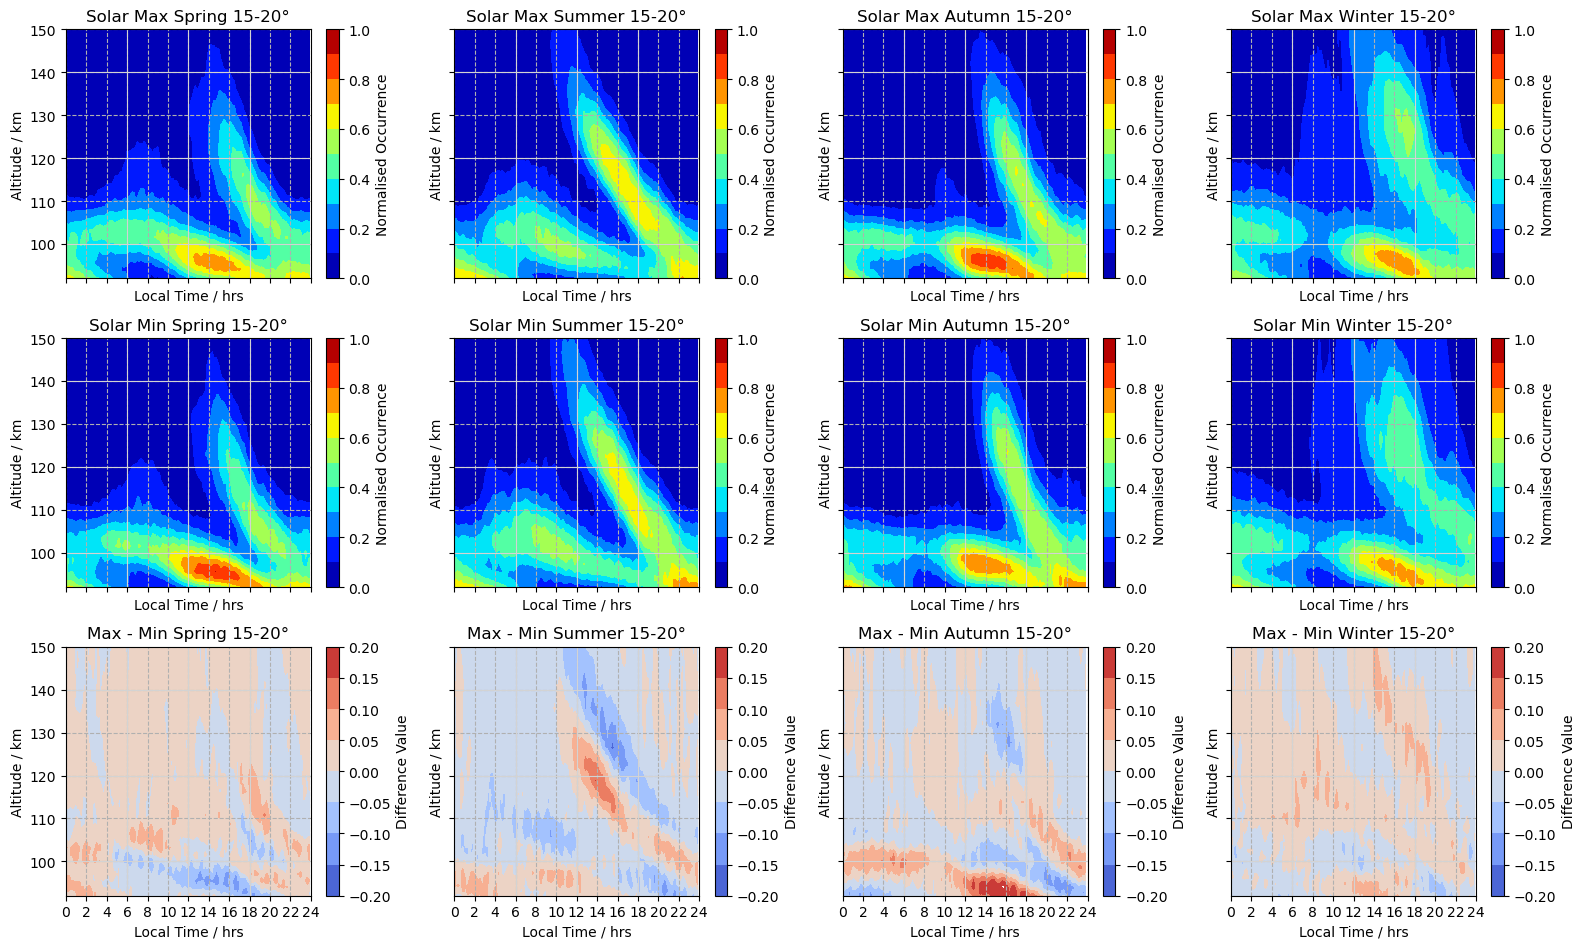

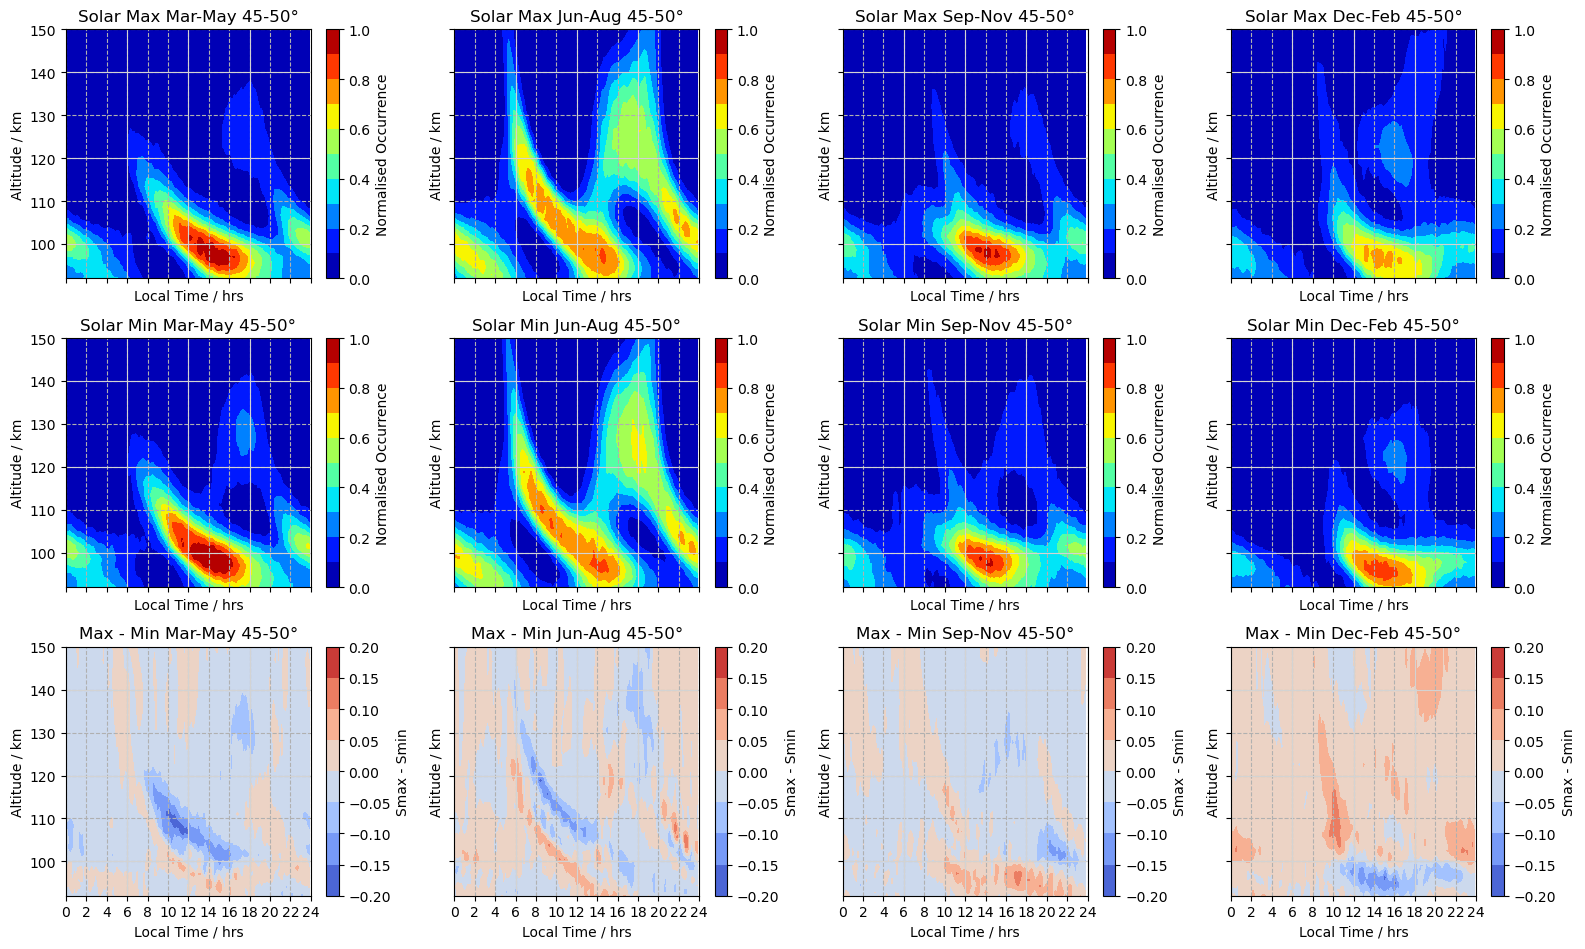

In [49]:

# Define a function to plot contour data
def plot_contour(ax, levdata, data, levels, cmap, title, cbar_label, cmap_diff=None, vmin=None, vmax=None, nolevsdiff=None):
    if cmap_diff:
        norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)  # Center colormap at zero
        contour = ax.contourf(LT_L, levdata, data, levels=np.linspace(vmin, vmax, nolevsdiff)
                              , cmap='coolwarm', norm=norm)
    else:
        contour = ax.contourf(LT_L, levdata, data, levels=levels, cmap=cmap)
        
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
    cbar.set_label(cbar_label)
    ax.set_title(title)
    ax.set_xlabel('Local Time / hrs')
    ax.set_ylabel('Altitude / km')
    ax.set_ylim(92,150)
    
    xticks = np.linspace(0, 24, 13)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.astype(int))
    
    ax.grid(True, linestyle='--')
    
    linew = 0.8
    colorr = '#d3d3d3'
    
    # Add vertical lines at x=6, 12, 18
    ax.axvline(6, color=colorr, linestyle='-', linewidth=linew)
    ax.axvline(12, color=colorr, linestyle='-', linewidth=linew)
    ax.axvline(18, color=colorr, linestyle='-', linewidth=linew)
    
    # Add horizontal lines at y=100, 120, 140
    ax.axhline(100, color=colorr, linestyle='-', linewidth=linew)
    ax.axhline(120, color=colorr, linestyle='-', linewidth=linew)
    ax.axhline(140, color=colorr, linestyle='-', linewidth=linew)
    

# Parameters for the plots
cmap = 'jet'
cmap_diff = 'coolwarm'
vmin = 0
vmax = 1
nolevs = 11
levels = np.linspace(vmin, vmax, nolevs)  # 10 contour levels

# Parameters for the difference plots
vmindiff = -0.2
vmaxdiff = 0.2
nolevsdiff = 9

# Dictionary to store data arrays
data_dict = {
    'spring_15_20_max': SpEs_spr_altLT_15_20_max_norm,
    'summer_15_20_max': SpEs_sum_altLT_15_20_max_norm,
    'autumn_15_20_max': SpEs_aut_altLT_15_20_max_norm,
    'winter_15_20_max': SpEs_win_altLT_15_20_max_norm,
    'spring_15_20_min': SpEs_spr_altLT_15_20_min_norm,
    'summer_15_20_min': SpEs_sum_altLT_15_20_min_norm,
    'autumn_15_20_min': SpEs_aut_altLT_15_20_min_norm,
    'winter_15_20_min': SpEs_win_altLT_15_20_min_norm,
    'spring_45_50_max': SpEs_spr_altLT_45_50_max_norm,
    'summer_45_50_max': SpEs_sum_altLT_45_50_max_norm,
    'autumn_45_50_max': SpEs_aut_altLT_45_50_max_norm,
    'winter_45_50_max': SpEs_win_altLT_45_50_max_norm,
    'spring_45_50_min': SpEs_spr_altLT_45_50_min_norm,
    'summer_45_50_min': SpEs_sum_altLT_45_50_min_norm,
    'autumn_45_50_min': SpEs_aut_altLT_45_50_min_norm,
    'winter_45_50_min': SpEs_win_altLT_45_50_min_norm,
}

# Define the subplots for the 15-20° latitude band
fig, axs = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)

# Plot Solar Max, Solar Min, and their difference for each season (Spring, Summer, Autumn, Winter)
seasons = ['spring', 'summer', 'autumn', 'winter']
monthlist = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

for i, season in enumerate(seasons):
    plot_contour(axs[0, i], alts_waccm[i], data_dict[f'{season}_15_20_max'], levels, cmap, f'Solar Max {season.capitalize()} 15-20°', 'Normalised Occurrence')
    plot_contour(axs[1, i], alts_waccm[i], data_dict[f'{season}_15_20_min'], levels, cmap, f'Solar Min {season.capitalize()} 15-20°', 'Normalised Occurrence')
    plot_contour(axs[2, i], alts_waccm[i], data_dict[f'{season}_15_20_max'] - data_dict[f'{season}_15_20_min'], None, cmap_diff, f'Max - Min {season.capitalize()} 15-20°', 'Difference Value', cmap_diff=cmap_diff, vmin=vmindiff, vmax=vmaxdiff, nolevsdiff=nolevsdiff)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('Figures/Solar_Comp/Lev-LT_Diff_15-20.png', dpi=400, bbox_inches='tight')

# Define the subplots for the 45-50° latitude band
fig, axs = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)

# Plot Solar Max, Solar Min, and their difference for each season (Spring, Summer, Autumn, Winter)
for i, season in enumerate(seasons):
    plot_contour(axs[0, i], alts_waccm[i], data_dict[f'{season}_45_50_max'], levels, cmap, f'Solar Max {monthlist[i]} 45-50°', 'Normalised Occurrence')
    plot_contour(axs[1, i], alts_waccm[i], data_dict[f'{season}_45_50_min'], levels, cmap, f'Solar Min {monthlist[i]} 45-50°', 'Normalised Occurrence')
    plot_contour(axs[2, i], alts_waccm[i], data_dict[f'{season}_45_50_max'] - data_dict[f'{season}_45_50_min'], None, cmap_diff, f'Max - Min {monthlist[i]} 45-50°', 'Smax - Smin', cmap_diff=cmap_diff, vmin=vmindiff, vmax=vmaxdiff, nolevsdiff=nolevsdiff)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('Figures/Solar_Comp/Lev-LT_Diff_45-50.png', dpi=400, bbox_inches='tight')

plt.show()


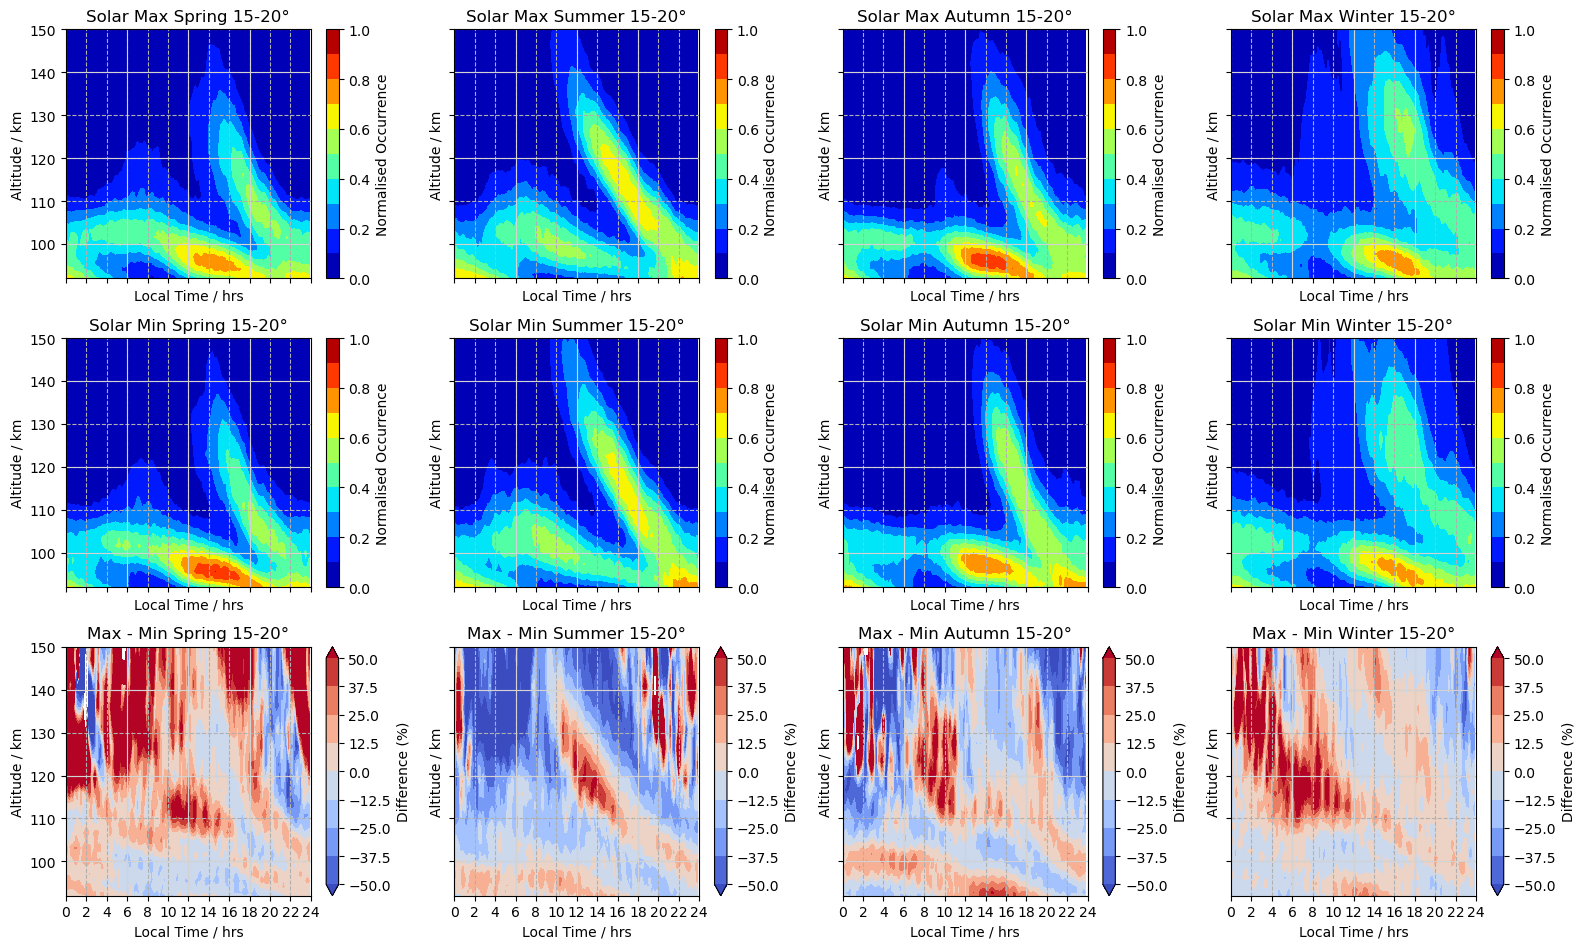

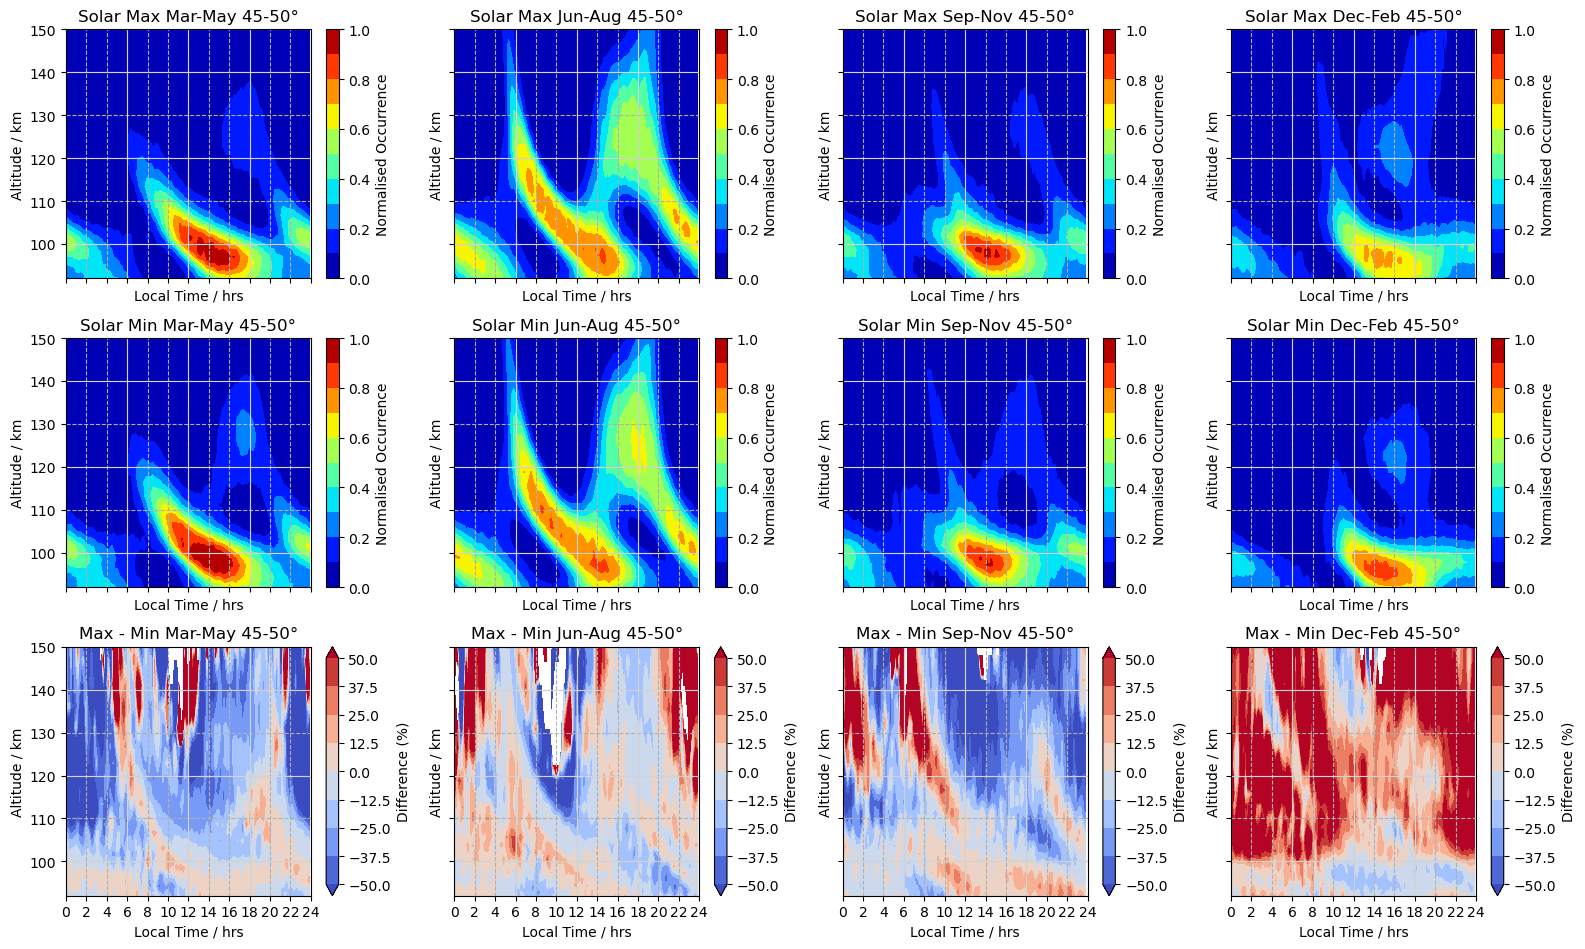

In [51]:

# Define a function to plot contour data
def plot_contour(ax, levdata, data, levels, cmap, title, cbar_label, cmap_diff=None, vmin=None, vmax=None, nolevsdiff=None):
    if cmap_diff:
        norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)  # Center colormap at zero
        contour = ax.contourf(LT_L, levdata, data
                              , levels=np.linspace(vmin, vmax, nolevsdiff)
                              , cmap='coolwarm', norm=norm, extend='both')
    else:
        contour = ax.contourf(LT_L, levdata, data, levels=levels, cmap=cmap)
        
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
    cbar.set_label(cbar_label)
    ax.set_title(title)
    ax.set_xlabel('Local Time / hrs')
    ax.set_ylabel('Altitude / km')
    ax.set_ylim(92,150)
    
    xticks = np.linspace(0, 24, 13)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.astype(int))
    
    ax.grid(True, linestyle='--')
    
    linew = 0.8
    colorr = '#d3d3d3'
    
    # Add vertical lines at x=6, 12, 18
    ax.axvline(6, color=colorr, linestyle='-', linewidth=linew)
    ax.axvline(12, color=colorr, linestyle='-', linewidth=linew)
    ax.axvline(18, color=colorr, linestyle='-', linewidth=linew)
    
    # Add horizontal lines at y=100, 120, 140
    ax.axhline(100, color=colorr, linestyle='-', linewidth=linew)
    ax.axhline(120, color=colorr, linestyle='-', linewidth=linew)
    ax.axhline(140, color=colorr, linestyle='-', linewidth=linew)
    

# Parameters for the plots
cmap = 'jet'
cmap_diff = 'coolwarm'
vmin = 0
vmax = 1
nolevs = 11
levels = np.linspace(vmin, vmax, nolevs)  # 10 contour levels

# Parameters for the difference plots
vmindiff = -50 #0.2
vmaxdiff = 50 #0.2
nolevsdiff = 9

# Dictionary to store data arrays
data_dict = {
    'spring_15_20_max': SpEs_spr_altLT_15_20_max_norm,
    'summer_15_20_max': SpEs_sum_altLT_15_20_max_norm,
    'autumn_15_20_max': SpEs_aut_altLT_15_20_max_norm,
    'winter_15_20_max': SpEs_win_altLT_15_20_max_norm,
    'spring_15_20_min': SpEs_spr_altLT_15_20_min_norm,
    'summer_15_20_min': SpEs_sum_altLT_15_20_min_norm,
    'autumn_15_20_min': SpEs_aut_altLT_15_20_min_norm,
    'winter_15_20_min': SpEs_win_altLT_15_20_min_norm,
    'spring_45_50_max': SpEs_spr_altLT_45_50_max_norm,
    'summer_45_50_max': SpEs_sum_altLT_45_50_max_norm,
    'autumn_45_50_max': SpEs_aut_altLT_45_50_max_norm,
    'winter_45_50_max': SpEs_win_altLT_45_50_max_norm,
    'spring_45_50_min': SpEs_spr_altLT_45_50_min_norm,
    'summer_45_50_min': SpEs_sum_altLT_45_50_min_norm,
    'autumn_45_50_min': SpEs_aut_altLT_45_50_min_norm,
    'winter_45_50_min': SpEs_win_altLT_45_50_min_norm,
}

# Define the subplots for the 15-20° latitude band
fig, axs = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)

# Plot Solar Max, Solar Min, and their difference for each season (Spring, Summer, Autumn, Winter)
seasons = ['spring', 'summer', 'autumn', 'winter']
monthlist = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

for i, season in enumerate(seasons):
    plot_contour(axs[0, i], alts_waccm[i], data_dict[f'{season}_15_20_max'], levels, cmap, f'Solar Max {season.capitalize()} 15-20°', 'Normalised Occurrence')
    plot_contour(axs[1, i], alts_waccm[i], data_dict[f'{season}_15_20_min'], levels, cmap, f'Solar Min {season.capitalize()} 15-20°', 'Normalised Occurrence')
    plot_contour(axs[2, i], alts_waccm[i], ((data_dict[f'{season}_15_20_max'] - data_dict[f'{season}_15_20_min'])/data_dict[f'{season}_15_20_min'])*100, None, cmap_diff, f'Max - Min {season.capitalize()} 15-20°', 'Difference (%)', cmap_diff=cmap_diff, vmin=vmindiff, vmax=vmaxdiff, nolevsdiff=nolevsdiff)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('Figures/Solar_Comp/Lev-LT_Diff_45-50.png', dpi=400, bbox_inches='tight')

# Define the subplots for the 45-50° latitude band
fig, axs = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)

# Plot Solar Max, Solar Min, and their difference for each season (Spring, Summer, Autumn, Winter)
for i, season in enumerate(seasons):
    plot_contour(axs[0, i], alts_waccm[i], data_dict[f'{season}_45_50_max'], levels, cmap, f'Solar Max {monthlist[i]} 45-50°', 'Normalised Occurrence')
    plot_contour(axs[1, i], alts_waccm[i], data_dict[f'{season}_45_50_min'], levels, cmap, f'Solar Min {monthlist[i]} 45-50°', 'Normalised Occurrence')
    plot_contour(axs[2, i], alts_waccm[i], ((data_dict[f'{season}_45_50_max'] - data_dict[f'{season}_45_50_min'])/data_dict[f'{season}_45_50_min'])*100, None, cmap_diff, f'Max - Min {monthlist[i]} 45-50°', 'Difference (%)', cmap_diff=cmap_diff, vmin=vmindiff, vmax=vmaxdiff, nolevsdiff=nolevsdiff)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig('Figures/Solar_Comp/Lev-LT_Diff_45-50.png', dpi=400, bbox_inches='tight')

plt.show()
